# Model DBSCAN

This Jupyter notebook is used to:

1. Run PCA.
2. Run DBSCAN.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            0.54203           0.80258          0.89334              0.00062   
1            0.54203           0.28579          0.89776              0.03561   
2            0.54203           0.04745          0.90701              0.02290   
3            0.54203           1.00000          0.18158              0.00076   
4            0.54203           0.85749          0.89332              0.00002   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.81895                0.00410                   0.00921   
1            0.81945                0.00652                   0.01008   
2            0.81980                0.00514                   0.00905   
3            0.08164                0.00746                   0.01120   
4            0.81715                0.00034                   0.00064   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.01021            0.00765                0.00139  ...   
1               0.00737            0.00765                0.00014  ...   
2               0.00794            0.00765                0.00066  ...   
3               0.01475            0.09263                0.00000  ...   
4               0.00113            0.00090                0.00002  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0        8094                      17       tcp      ssl          SF   
1        1341                      12       tcp      ssl          SF   
2        3866                       9       tcp      ssl          SF   
3           0                       0       udp      dns          S0   
4         146                       2       udp      dns          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn    resp_443              No            No   
1  orig_reg_or_dyn    resp_443              No            No   
2  orig_reg_or_dyn    resp_443              No            No   
3  orig_reg_or_dyn    resp_reg              No            No   
4  orig_reg_or_dyn     resp_53              No            No   

                     timestamp  
0  2017-07-07T19:21:44.529744Z  
1  2017-07-07T19:21:52.456551Z  
2   2017-07-07T19:22:09.06327Z  
3  2017-07-07T19:00:26.688648Z  
4  2017-07-07T19:21:44.496311Z  

[5 rows x 291 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            0.54203           0.85749          0.92477              0.00010   
1            0.00000           0.85749          0.53868              0.00387   
2            0.00000           0.85749          0.35068              0.00308   
3            0.00000           0.85749          0.56029              0.00128   
4            0.00000           0.85749          0.52264              0.00458   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.91953                0.00030                   0.00044   
1            0.53366                0.00012                   0.00175   
2            0.76206                0.00012                   0.00197   
3            0.54980                0.00012                   0.00197   
4            0.85503                0.00012                   0.00175   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00057            0.00090                0.00001  ...   
1               0.00397            0.00137                0.00224  ...   
2               0.00454            0.00137                0.00224  ...   
3               0.00454            0.00137                0.00224  ...   
4               0.00397            0.00137                0.00224  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0          95                       1       udp      dns          SF   
1       11807                       5       tcp     http        RSTO   
2       11807                       5       tcp     http        RSTO   
3       11807                       5       tcp     http        RSTO   
4       11807                       5       tcp     http        RSTO   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_53              No            No   
1  orig_reg_or_dyn     resp_80             Yes           Yes   
2  orig_reg_or_dyn     resp_80             Yes           Yes   
3  orig_reg_or_dyn     resp_80             Yes           Yes   
4  orig_reg_or_dyn     resp_80             Yes           Yes   

                     timestamp  
0  2017-07-07T19:22:40.953024Z  
1   2017-07-07T19:11:07.79779Z  
2  2017-07-07T19:05:30.273358Z  
3   2017-07-07T19:11:46.59465Z  
4   2017-07-07T19:10:39.00533Z  

[5 rows x 291 columns]

In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 116256 rows and 291 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count       116256.00000      116256.00000     116256.00000   
mean             0.09581           0.83796          0.39913   
std              0.20677           0.10722          0.21159   
min              0.00000           0.00000          0.00000   
25%              0.00000           0.85749          0.21402   
50%              0.00000           0.85749          0.39891   
75%              0.00000           0.85749          0.57133   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count         116256.00000       116256.00000           116256.00000   
mean               0.00576            0.73460                0.00066   
std                0.01333            0.23539                0.00637   
min                0.00000            0.00000                0.00000   
25%                0.00158            0.57423                0.00012   
50%                0.00447            0.82244                0.00012   
75%                0.00706            0.91315                0.00012   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count              116256.00000          116256.00000       116256.00000   
mean                    0.00247               0.00441            0.00206   
std                     0.00811               0.00620            0.01392   
min                     0.00000               0.00000            0.00000   
25%                     0.00175               0.00397            0.00137   
50%                     0.00197               0.00454            0.00137   
75%                     0.00197               0.00454            0.00137   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count           116256.00000              116256.00000          116256.00000   
mean                 0.00203                   0.00205               0.00228   
std                  0.00578                   0.00579               0.00625   
min                  0.00000                   0.00000               0.00000   
25%                  0.00224                   0.00223               0.00159   
50%                  0.00224                   0.00224               0.00199   
75%                  0.00224                   0.00225               0.00239   
max                  1.00000                   1.00000               1.00000   

         dns_count    ssh_count   http_count    ssl_count  files_count  \
count 116256.00000 116256.00000 116256.00000 116256.00000 116256.00000   
mean       0.12359      0.00069      0.83958      0.02531      0.03901   
std        0.32911      0.02622      0.36700      0.15705      0.02358   
min        0.00000      0.00000      0.00000      0.00000      0.00000   
25%        0.00000      0.00000      1.00000      0.00000      0.04348   
50%        0.00000      0.00000      1.00000      0.00000      0.04348   
75%        0.00000      0.00000      1.00000      0.00000      0.04348   
max        1.00000      1.00000      1.00000      1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count     116256.00000                    116256.00000   
mean           0.71890                         0.39681   
std            0.35347                         0.19999   
min            0.00000                         0.00000   
25%            0.58493                         0.20369   
50%            0.87674                         0.39789   
75%            0.99593                         0.56622   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                        116256.00000   
mean                              0.08118   
std                               0.04877   
min           

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.92477              0.00010            0.91953   
1          0.53868              0.00387            0.53366   
2          0.35068              0.00308            0.76206   
3          0.56029              0.00128            0.54980   
4          0.52264              0.00458            0.85503   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00030               0.00057            0.00090   
1                0.00012               0.00397            0.00137   
2                0.00012               0.00454            0.00137   
3                0.00012               0.00454            0.00137   
4                0.00012               0.00397            0.00137   

   connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                0.00001               0.00040    1.00000    0.00000   
1                0.00224               0.00199    0.00000    0.00000   
2                0.00224               0.00199    0.00000    0.00000   
3                0.00224               0.00199    0.00000    0.00000   
4                0.00224               0.00199    0.00000    0.00000   

   http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0     0.00000    0.00000      0.00000                           1   
1     1.00000    0.00000      0.04348                           1   
2     1.00000    0.00000      0.04348                           1   
3     1.00000    0.00000      0.04348                           1   
4     1.00000    0.00000      0.04348                           1   

   orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           0                    0                   0   
4                           0                    0                   0   

   resp_p_cat_resp_22  resp_p_cat_resp_443  resp_p_cat_resp_53  \
0                   0                    0                   1   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   

   resp_p_cat_resp_80  resp_p_cat_resp_dyn  resp_p_cat_resp_reg  \
0                   0                    0                    0   
1                   1                    0                    0   
2                   1                    0                    0   
3                   1                    0                    0   
4                   1                    0                    0   

   resp_p_cat_resp_well_known  connection.proto_icmp  connection.proto_tcp  \
0                           0                      0                     0   
1                           0                      0                     1   
2                           0                      0                     1   
3                           0                      0                     1   
4                           0                      0                     1   

   connection.proto_udp  connection.service_dce_rpc  \
0                     1                           0   
1                     0                           0   
2                     0                           0   
3                     0                           0   
4                     0                           0   

   connection.service_dce_rpc,gssapi,smb  connection.service_dns  \
0                                      0                       1   
1                                      0                       0   
2                                      0                       0   
3                                      0          

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl',
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_SF'],
      dtype='object', length=202)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 202 principal components: 0.9999999999999996


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.96283758]
Variance Captured by First   7 Principal Components: [0.94523356]
Variance Captured by First   5 Principal Components: [0.92465018]
Variance Captured by First   2 Principal Components: [0.85077285]
Variance Captured by the First Principal Component:  [0.75899635]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.65447152
Variance of connection.duration                       : 0.10452484
Variance of connection.orig_p                         : 0.04659119
Variance of connection.orig_bytes                     : 0.04518531
Variance of connection.orig_pkts                      : 0.03474128
Variance of connection.resp_p                         : 0.02161779
Variance of connection.resp_bytes                     : 0.01751826
Variance of connection.resp_pkts                      : 0.01242123
Variance of dns_count                                 : 0.00816214
Variance of ssh_count                                 : 0.00690784
Variance of http_count                                : 0.00590696
Variance of ssl_count                                 : 0.00478922
Variance of files_count                               : 0.00352930
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00287996
Variance of orig_p_cat_orig_well_known                : 0.0026

In [16]:
# https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_, columns=df.columns)

connection.time  connection.duration  connection.orig_p  \
0            0.01757              0.00030           -0.00612   
1            0.01572              0.00574            0.02158   
2           -0.07097             -0.00388            0.06065   
3            0.22204             -0.00391            0.08138   
4            0.32296              0.00219            0.07782   
..               ...                  ...                ...   
197          0.00000              0.00000           -0.00000   
198          0.00000             -0.00000            0.00000   
199         -0.00000              0.00000           -0.00000   
200         -0.00000              0.00000           -0.00000   
201         -0.00000             -0.00000           -0.00000   

     connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                  0.00044              -0.00022            0.00050   
1                  0.00180               0.00168            0.00215   
2                 -0.00130              -0.00133           -0.00181   
3                 -0.00133              -0.00117           -0.00148   
4                  0.00068               0.00091            0.00124   
..                     ...                   ...                ...   
197               -0.00000              -0.00000            0.00000   
198                0.00000               0.00000           -0.00000   
199               -0.00000              -0.00000           -0.00000   
200               -0.00000              -0.00000           -0.00000   
201                0.00000              -0.00000            0.00000   

     connection.resp_bytes  connection.resp_pkts  dns_count  ssh_count  \
0                 -0.00024               0.00005    0.13804    0.00033   
1                  0.00069               0.00141   -0.16851    0.00029   
2                 -0.00047              -0.00112    0.09534   -0.00197   
3                 -0.00040              -0.00102    0.07324   -0.00048   
4                  0.00038               0.00079   -0.04047    0.00143   
..                     ...                   ...        ...        ...   
197               -0.00000               0.00000   -0.00000   -0.04087   
198                0.00000              -0.00000    0.00000    0.05071   
199               -0.00000               0.00000   -0.00000   -0.00496   
200               -0.00000               0.00000    0.00000   -0.00000   
201               -0.00000               0.00000    0.00000    0.09032   

     http_count  ssl_count  files_count  orig_p_cat_orig_reg_or_dyn  \
0      -0.16932    0.02240     -0.00524                    -0.00199   
1       0.03198    0.10759      0.01182                    -0.00254   
2       0.00803   -0.08044     -0.00671                     0.00214   
3       0.02172   -0.07753     -0.00535                     0.00067   
4      -0.04479    0.07517      0.00506                     0.00034   
..          ...        ...          ...                         ...   
197     0.00000   -0.00102     -0.00000                    -0.03306   
198    -0.00000   -0.00100      0.00000                     0.04634   
199     0.00000    0.00008     -0.00000                    -0.00403   
200     0.00000   -0.00000     -0.00000                    -0.00000   
201     0.00000   -0.21521     -0.00000                    -0.23543   

     orig_p_cat_orig_well_known  resp_p_cat_resp_123  resp_p_cat_resp_21  \
0                       0.00199              0.00107             0.00012   
1                       0.00254              0.00200             0.00009   
2                      -0.00214             -0.00125            -0.00067   
3                      -0.00067             -0.00120            -0.00023   
4                      -0.00034             -0.00017             0.00049   
..                          ...                  ...                 ...   
197                    -0.03306             -0.01667             0.02667   
198                     0.04634  

In [17]:
pca_X = pca_X.sample(50000)

In [18]:
pca_X = pca_X.iloc[:, :150]  # take first 150 principal components
pca_X

0        1        2        3        4        5        6        7    \
15621 -0.96087 -0.01270  0.59483 -0.61345  0.20286  0.33469  0.07405 -0.07692   
26306  3.89870  2.68351 -1.12468 -0.59576  0.92512 -0.15493 -0.57799 -0.32122   
51512 -0.38777  0.25353 -0.46861  0.26999  0.33105  1.24467 -0.05168 -0.13177   
36056 -0.80454  0.02329 -0.56883  0.65451  0.12595  0.23458 -0.13862 -0.04791   
87874 -0.83266  0.08719 -0.43413  0.14827 -0.94845 -0.05485  0.35820 -0.01184   
...        ...      ...      ...      ...      ...      ...      ...      ...   
49052 -0.95824 -0.03285  0.59705 -0.64688  0.17185  0.33598  0.09169 -0.07379   
46540 -0.98635 -0.06003 -0.07019 -0.05318 -0.53149 -0.28454  0.16225  0.04011   
4802  -1.13806 -0.17984  0.30171 -0.05441  0.32040 -0.53378 -0.20899  0.13015   
10850 -0.92474  0.07481 -0.37379  0.17369 -0.90052 -0.09100  0.33481 -0.04922   
5299  -0.81436  0.07941 -0.47812  0.10161 -0.99928 -0.08680  0.36721  0.07571   

           8        9        10       11       12       13       14       15   \
15621 -0.14295 -0.06012 -0.01363  0.03064 -0.00734  0.00178 -0.02166 -0.02346   
26306  0.07013  0.04200  0.31031  0.53654  0.01143  0.31228 -0.05165 -0.07246   
51512  0.13064  0.32921 -0.40657  0.01534 -0.04382  0.08538  0.03680  0.01374   
36056  0.16929  0.03722 -0.01599 -0.01542  0.03643 -0.00870  0.02578  0.16226   
87874 -0.14186 -0.05985  0.01992  0.00085 -0.03109  0.03474 -0.09844 -0.04414   
...        ...      ...      ...      ...      ...      ...      ...      ...   
49052 -0.13692 -0.06286 -0.01826  0.03380  0.00016 -0.01899  0.00012 -0.01864   
46540 -0.14848  0.00317 -0.08821  0.04821  0.00060  0.00933 -0.06925  0.11715   
4802  -0.05197  0.14944 -0.17934  0.04404  0.00207 -0.04038  0.02907  0.04402   
10850 -0.15039 -0.14315  0.09390 -0.00306 -0.02961  0.09100 -0.16782  0.01041   
5299   0.34184  0.05103  0.13356 -0.13256 -0.03061  0.07411 -0.04511 -0.02952   

           16       17       18       19       20       21       22       23   \
15621 -0.00879  0.01350  0.02335  0.00844  0.01995 -0.01492  0.00548 -0.00227   
26306 -0.32106  0.33817 -0.37524 -0.20952 -0.01272 -0.00422 -0.44759 -0.39533   
51512 -0.07110 -0.08133  0.01146  0.06270 -0.00027 -0.05776  0.00595 -0.01811   
36056  0.07636 -0.05210 -0.05644 -0.02019 -0.03879  0.02635 -0.00093  0.00327   
87874 -0.02210  0.04747  0.04719 -0.02447  0.03949  0.03893  0.00818 -0.00878   
...        ...      ...      ...      ...      ...      ...      ...      ...   
49052  0.00812  0.01057  0.00365  0.00618  0.01708 -0.02229  0.00954 -0.01110   
46540  0.01504  0.00626  0.03821 -0.02167 -0.01014  0.00492 -0.00477  0.01280   
4802   0.06092  0.01718 -0.02260 -0.04073 -0.00185  0.03072  0.00419 -0.00084   
10850 -0.07905  0.02120  0.10438  0.03155  0.01959  0.01105 -0.00763  0.00590   
5299  -0.03628 -0.00572  0.00453 -0.02403  0.01989  0.04237  0.00384 -0.01176   

           24       25       26       27       28       29       30       31   \
15621 -0.01272 -0.01867  0.00252  0.01894 -0.00534 -0.01642 -0.00357  0.02045   
26306 -0.06482  0.15154 -0.12136  0.02092 -0.15118 -0.00672 -0.17654 -0.18628   
51512 -0.04150  0.01444  0.00950 -0.03205  0.00779 -0.01540  0.01845  0.00504   
36056  0.04303  0.02032 -0.04651  0.00962  0.00523  0.04074 -0.02246 -0.02926   
87874  0.01688  0.01008 -0.03039 -0.00572  0.00074 -0.00567 -0.00474 -0.01060   
...        ...      ...      ...      ...      ...      ...      ...      ...   
49052 -0.03844 -0.01564  0.00369  0.02810 -0.00553  0.00715 -0.00773  0.00338   
46540  0.00666  0.01061 -0.06054  0.05861  0.00673  0.04428 -0.03608 -0.00954   
4802   0.03663  0.03062 -0.01622 -0.04846  0.01345 -0.01809  0.00933  0.00285   
10850  0.00917 -0.04179 -0.04043  0.08323 -0.02630  0.03136 -0.02774 -0.02614   
5299   0.01604  0.02206 -0.02510 -0.01575  0.00468 -0.00996 -0.00189 -0.00594   

           32       33       34       35       36       37       38       39   \
15621  0.02403 -0.00786  0.00051  0.00

## 2. DBSCAN

(https://towardsdatascience.com/dbscan-with-python-743162371dca)

(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan)

### Parameters of sklearn.cluster.DBSCAN: 

```
eps:
        Max distance between two samples (where one is in the neighborhood of the other), not max distances of points within a cluster.
        (default is 0.5)

min_samples:
        Num of samples in core points' neighborhood (including the point itself)
        (default is 5)

metric:
        Distance function. 
        (default is ’euclidean’, options available at sklearn.metrics.pairwise_distances)

metric_params
        Additional keyword arguments for the metric function.
        (default is None)

algorithm: 
        {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
        Alg. used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors.
        (default is ’auto’)
    
leaf_size:
        Leaf size passed to BallTree or cKDTree, can affect the speed of the construction and query, as well as the memory required to store the tree, optimal value depends on the nature of the problem.
        (default is 30)
 
p: 
        Power of the Minkowski metric (used when calculating distance between points).
        (default is None, if None p == 2, which is equivalent to Euclidean distance)
    
n_jobsint:
        Num of parallel jobs to run. 
        (default is None, None == 1, -1 == use all processors)
        
```

### Attributes: 

```
core_sample_indices_:
        Indices of core samples.
        
components_:
        Copy of each core sample found by training.

labels_:
        Cluster labels for each point in the dataset given to fit(), noisy samples have label -1.
        
n_features_in_:
        Num of features seen during fit.

feature_names_in_:
        Names of features seen during fit. Defined only when X has feature names that are all strings.
```

In [19]:
from datetime import datetime
# https://www.machinecurve.com/index.php/2020/12/09/performing-dbscan-clustering-with-python-and-scikit-learn/
from sklearn.cluster import DBSCAN

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
db = DBSCAN(eps=2.0, min_samples=250, n_jobs=-1)
db_fitted = db.fit(pca_X)
y_db = db.fit_predict(pca_X)
print_str = 'DBSCAN finished ({})'.format(datetime.now().strftime("%H:%M:%S"))
print(print_str)

print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 15:30:01.
DBSCAN finished (15:32:12)
Done at 15:32:12.


In [20]:
print_str

'DBSCAN finished (15:32:12)'

In [21]:
# Indices of core samples
db_fitted.core_sample_indices_

array([    0,     2,     3, ..., 49997, 49998, 49999])

In [22]:
# Copy of each core sample found by training
db_fitted.components_

array([[-9.60873064e-01, -1.27023981e-02,  5.94826392e-01, ...,
        -1.24042922e-04,  4.23444019e-05,  9.79998953e-06],
       [-3.87770176e-01,  2.53528234e-01, -4.68614609e-01, ...,
        -2.26810678e-05,  4.71532954e-05,  9.65113370e-06],
       [-8.04538329e-01,  2.32910187e-02, -5.68831606e-01, ...,
        -2.65742933e-04,  1.03078162e-04,  1.46311366e-05],
       ...,
       [-1.13805842e+00, -1.79842943e-01,  3.01710787e-01, ...,
         9.19604670e-05, -1.34342235e-04,  8.97786706e-06],
       [-9.24735001e-01,  7.48071182e-02, -3.73791164e-01, ...,
         2.01494928e-04, -1.55724290e-04,  1.89095460e-05],
       [-8.14360693e-01,  7.94085270e-02, -4.78120233e-01, ...,
         9.92414125e-05, -9.98092893e-05,  6.51274842e-06]])

In [23]:
# Number of features seen during fit
db_fitted.n_features_in_

150

In [24]:
# Noisy samples have label -1
db_fitted.labels_

array([0, 3, 0, ..., 0, 0, 0])

In [25]:
y_db

array([0, 3, 0, ..., 0, 0, 0])

In [26]:
# Add cluster labels to original dataframe
pca_X['cluster'] = y_db
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [27]:
pca_X.head()

0        1        2        3        4        5        6        7  \
15621 -0.96087 -0.01270  0.59483 -0.61345  0.20286  0.33469  0.07405 -0.07692   
26306  3.89870  2.68351 -1.12468 -0.59576  0.92512 -0.15493 -0.57799 -0.32122   
51512 -0.38777  0.25353 -0.46861  0.26999  0.33105  1.24467 -0.05168 -0.13177   
36056 -0.80454  0.02329 -0.56883  0.65451  0.12595  0.23458 -0.13862 -0.04791   
87874 -0.83266  0.08719 -0.43413  0.14827 -0.94845 -0.05485  0.35820 -0.01184   

             8        9       10       11       12       13       14       15  \
15621 -0.14295 -0.06012 -0.01363  0.03064 -0.00734  0.00178 -0.02166 -0.02346   
26306  0.07013  0.04200  0.31031  0.53654  0.01143  0.31228 -0.05165 -0.07246   
51512  0.13064  0.32921 -0.40657  0.01534 -0.04382  0.08538  0.03680  0.01374   
36056  0.16929  0.03722 -0.01599 -0.01542  0.03643 -0.00870  0.02578  0.16226   
87874 -0.14186 -0.05985  0.01992  0.00085 -0.03109  0.03474 -0.09844 -0.04414   

            16       17       18       19       20       21       22       23  \
15621 -0.00879  0.01350  0.02335  0.00844  0.01995 -0.01492  0.00548 -0.00227   
26306 -0.32106  0.33817 -0.37524 -0.20952 -0.01272 -0.00422 -0.44759 -0.39533   
51512 -0.07110 -0.08133  0.01146  0.06270 -0.00027 -0.05776  0.00595 -0.01811   
36056  0.07636 -0.05210 -0.05644 -0.02019 -0.03879  0.02635 -0.00093  0.00327   
87874 -0.02210  0.04747  0.04719 -0.02447  0.03949  0.03893  0.00818 -0.00878   

            24       25       26       27       28       29       30       31  \
15621 -0.01272 -0.01867  0.00252  0.01894 -0.00534 -0.01642 -0.00357  0.02045   
26306 -0.06482  0.15154 -0.12136  0.02092 -0.15118 -0.00672 -0.17654 -0.18628   
51512 -0.04150  0.01444  0.00950 -0.03205  0.00779 -0.01540  0.01845  0.00504   
36056  0.04303  0.02032 -0.04651  0.00962  0.00523  0.04074 -0.02246 -0.02926   
87874  0.01688  0.01008 -0.03039 -0.00572  0.00074 -0.00567 -0.00474 -0.01060   

            32       33       34       35       36       37       38       39  \
15621  0.02403 -0.00786  0.00051  0.00106  0.00683 -0.00392 -0.00137  0.01143   
26306  0.14264 -0.26602 -0.27119 -0.01934 -0.11213  0.16956 -0.02531  0.11986   
51512  0.00703  0.00546  0.01288  0.00246  0.00241  0.00089 -0.01687 -0.01570   
36056 -0.04367  0.01191 -0.00360 -0.00828 -0.00900  0.00377  0.03504 -0.01608   
87874  0.01204  0.00190 -0.00235 -0.00057 -0.00296 -0.00135 -0.01692 -0.01185   

            40       41       42       43       44       45       46       47  \
15621  0.00305 -0.01980  0.00475  0.00639  0.00867 -0.00034  0.00102 -0.00385   
26306 -0.11384  0.04716  0.16933  0.00617  0.06364  0.07263  0.00791 -0.02041   
51512 -0.00902  0.03017 -0.01159 -0.02002 -0.01305  0.00166  0.00317  0.00281   
36056 -0.00360  0.02427 -0.02043  0.00145 -0.01026  0.00655  0.01139  0.01966   
87874  0.01213  0.01584  0.00191  0.00190  0.01003 -0.00285 -0.00555 -0.00628   

            48       49       50       51       52       53       54       55  \
15621 -0.00216 -0.00965  0.00059  0.00322  0.00386  0.01181 -0.00523  0.00374   
26306  0.00165  0.02554 -0.14389  0.26687 -0.14512 -0.19977 -0.24508 -0.15457   
51512 -0.00082 -0.00009  0.00173  0.00599 -0.00331  0.00277 -0.01064  0.00021   
36056  0.00437  0.01298 -0.00347  0.00997  0.00815 -0.00910  0.01389 -0.01705   
87874 -0.00163  0.01095  0.00602 -0.00322 -0.00246 -0.00548  0.00941 -0.00468   

            56       57       58      59       60      61       62       63  \
15621  0.00293 -0.00134  0.00103 0.00386  0.00261 0.00500 -0.00317  0.00112   
26306 -0.31217  0.41943  0.30977 0.27333 -0.16184 0.09748 -0.17458 -0.18419   
51512 -0.00374  0.00090 -0.00316 0.00364  0.00644 0.00065  0.00095  0.00141   
36056  0.02146  0.01189 -0.00248 0.01458 -0.00017 0.01320 -0.00822  0.00535   
87874  0.00929  0.00579 -0.00096 0.00882  0.00268 0.00885 -0.00373  0.00174   

            64       65       66       67       68       69       70       71  \
15621 -0.00136 -0.00110 -0.00064 -0.00520  0.000

In [28]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 142,           143,           144,           145,
                 146,           147,           148,           149,
           'cluster', 'cluster_cat'],
      dtype='object', length=152)

In [29]:
pca_X['cluster'].value_counts()

 0    41193
 2     3794
 1     1443
-1     1082
 3      912
 4      872
 5      704
Name: cluster, dtype: int64

In [30]:
pca_X['cluster'].unique()

array([ 0,  3,  1,  2, -1,  4,  5])

## 3. Results

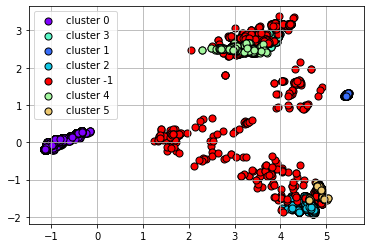

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

K_CLUSTERS = len(pca_X['cluster'].value_counts())

colors = mcm.rainbow(np.linspace(0, 1, K_CLUSTERS + 1))

# plot the clusters
for i in pca_X['cluster'].unique():   
    plt.scatter(
        pca_X_array[db_fitted.labels_ == i, 0], pca_X_array[db_fitted.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [32]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[db_fitted.labels_ == i, 0], 
                   pca_X_array[db_fitted.labels_ == i, 1], 
                   pca_X_array[db_fitted.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

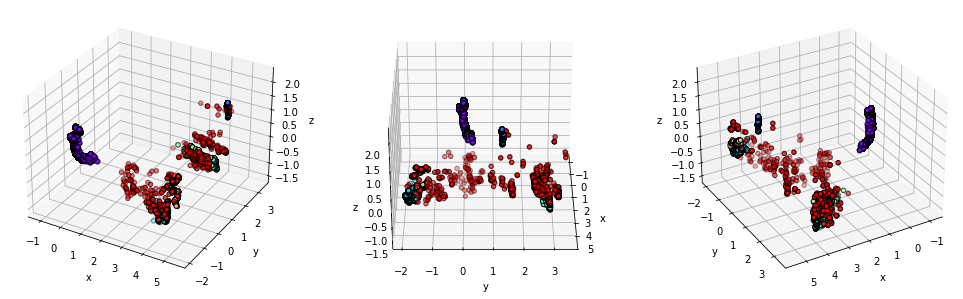

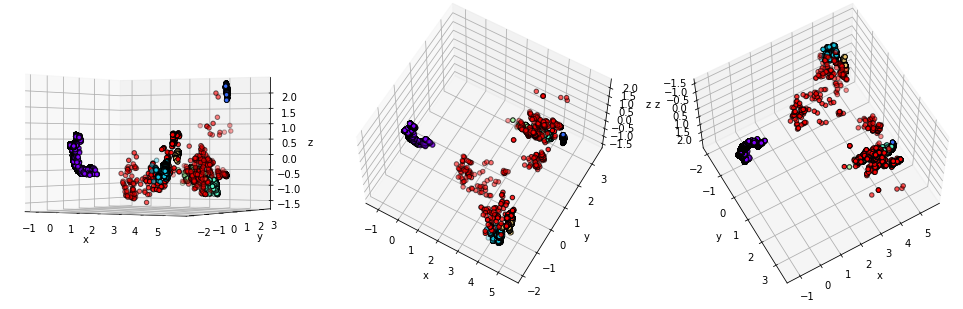

In [33]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [34]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [35]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6  \
0       5.45946  1.29556  1.77836  1.86097  0.04660  0.23299 -0.36604   
1           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      -1.04786 -0.09064 -0.22256  0.43522  0.18918 -0.07379 -0.15297   
4      -1.05169 -0.00182 -0.11344  0.39017  0.11845 -0.16179 -0.07531   
...         ...      ...      ...      ...      ...      ...      ...   
116251      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
116252  4.70795 -1.74366 -0.41536 -0.15144  0.22999  0.11150 -0.55085   
116253 -0.98891 -0.03062  0.23783 -0.33956 -0.28405  0.01018  0.16096   
116254 -0.71072  0.10591 -0.54361  0.14787 -1.01789  0.00328  0.38097   
116255      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

              7        8        9       10       11       12       13  \
0      -0.26859  0.06301  0.10388  0.12348 -0.13139 -0.03145  0.12315   
1           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      -0.04824  0.19932 -0.16121  0.22932 -0.04718  0.06183 -0.08000   
4      -0.04456 -0.10303 -0.15518  0.16915 -0.03963 -0.02234  0.03061   
...         ...      ...      ...      ...      ...      ...      ...   
116251      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
116252  0.06461  0.51924 -0.12609 -0.06612 -0.02108 -0.15664  0.07630   
116253 -0.02963 -0.15287 -0.05820 -0.03377  0.04889 -0.00245  0.05873   
116254  0.03716 -0.15129  0.10786 -0.17811  0.02065 -0.05065 -0.00928   
116255      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

             14       15       16       17       18       19       20  \
0       0.03244 -0.18776 -0.01358  0.03749 -0.04452 -0.07630  0.12354   
1           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       0.11501  0.07873  0.07995 -0.05081 -0.07824  0.01433 -0.05015   
4      -0.03334 -0.22976 -0.10691  0.02770  0.08162  0.06430 -0.01389   
...         ...      ...      ...      ...      ...      ...      ...   
116251      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
116252 -0.45971 -0.13376 -0.16641 -0.00551  0.12254 -0.05429 -0.01817   
116253 -0.08433  0.11866 -0.09302 -0.01691  0.13118  0.00777 -0.01377   
116254  0.01210 -0.12479 -0.00635  0.04360 -0.00570 -0.03232  0.08890   
116255      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

             21       22       23       24       25       26       27  \
0       0.11229  0.08718 -0.03062  0.03429 -0.00548 -0.16684 -0.04033   
1           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      -0.06565  0.00293 -0.02415 -0.09928  0.02138  0.03328 -0.01924   
4      -0.01548 -0.03233  0.02933  0.02544 -0.07297  0.10289  0.01933   
...         ...      ...      ...      ...      ...      ...      ...   
116251      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
116252  0.02173  0.01585  0.10493  0.13614  0.05418 -0.00015 -0.01033   
116253 -0.01971  0.01065  0.02669 -0.04944  0.10219 -0.04368 -0.02962   
116254 -0.01242  0.04653 -0.05398 -0.09891  0.03754 -0.02256 -0.04663   
116255      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

             28       29       30       31       32       33       34  \
0      -0.02588  0.13041 -0.03401  0.02192  0.00893  0.06552 -0.04420   
1           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       0.00912 -0.01287  0.00906  0.03146 -0.00235  0.00067  0.01850   
4      -0.03190  0.01542  0.03092 -0.02888 -0.01430 -0.00705 -0.01250   
...         ...      ...      ...      ...      ...      ...      ..

In [36]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
result.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0          -1     1082      tcp     ssl         SF  orig_reg_or_dyn   
1           0    41193      tcp    http       RSTO  orig_reg_or_dyn   
2           1     1443      udp     dns         SF  orig_reg_or_dyn   
3           2     3794      udp     dns         SF  orig_reg_or_dyn   
4           3      912      tcp     ssl         SF  orig_reg_or_dyn   
5           4      872      tcp    http         SF  orig_reg_or_dyn   
6           5      704      udp     dns         SF  orig_reg_or_dyn   

  resp_p_cat  connection.time  connection.duration  connection.orig_bytes  \
0   resp_443          0.63692              0.01828                0.00812   
1    resp_80          0.38234              0.00516                0.00012   
2    resp_53          0.50484              0.00012                0.00031   
3    resp_53          0.38873              0.00003                0.00045   
4   resp_443          0.40162              0.03819                0.01101   
5    resp_80          0.38651              0.02190                0.00884   
6    resp_53          0.85877              0.00004                0.00057   

   connection.orig_pkts  connection.resp_bytes  connection.resp_pkts  \
0               0.00844                0.00235               0.00603   
1               0.00453                0.00224               0.00215   
2               0.00058                0.00002               0.00041   
3               0.00122                0.00004               0.00081   
4               0.01385                0.00596               0.01159   
5               0.00661                0.00115               0.00478   
6               0.00140                0.00004               0.00083   

   dns_count  ssh_count  http_count  ssl_count  files_count  
0    0.16821    0.03235     0.08503    0.34196      0.04195  
1    0.00000    0.00000     1.00000    0.00000      0.04347  
2    1.00000    0.00000     0.00000    0.00000      0.00000  
3    1.00000    0.00000     0.00000    0.00000      0.00000  
4    0.00000    0.00000     0.00000    0.98575      0.07051  
5    0.00000    0.00000     0.85436    0.00000      0.05839  
6    1.00000    0.00000     0.00000    0.00000      0.00000

In [37]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [38]:
plt.rcParams["figure.figsize"] = (10,7)

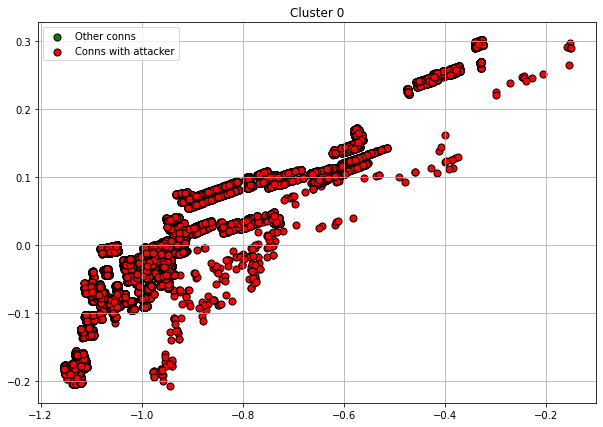

Total num of conns: 41193

Attacker conns ratio:
Yes    41193
Name: attacker_label, dtype: int64

IPs:
172.16.0.1    41193
Name: originated_ip, dtype: int64

192.168.10.50    41193
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T18:56:31.796937Z
timestamp max = 2017-07-07T19:16:10.645771Z

Cluster 0 NOK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
16386   CF2HlW2snAc6IkX5eh            0.00000    172.16.0.1           0.85749   
23739   Cnhwrv2xM0ezqRQ1j1            0.00000    172.16.0.1           0.85749   
44614   CkC8wK10K87oBaS30e            0.00000    172.16.0.1           0.85749   
15035   CE2w1r25oZqMwXywb7            0.00000    172.16.0.1           0.85749   
45290   CykdOS2B9jlKqagFyl            0.00000    172.16.0.1           0.85749   
82442   CX5fZz2LB21gafRzRi            0.00000    172.16.0.1           0.85749   
102349  CxSA143GiRMFqb4c6d            0.00000    172.16.0.1           0.85749   
26797   CTzo9n4RbTmVPzkJ11            0.00000    172.16.0.1           0.85749   
1011    CA2PKQ1JeHB583yKka            0.00000    172.16.0.1           0.85749   
110071  CjLfP43T3ZBcNxHmCl            0.00000    172.16.0.1           0.85749   
92199    CS7aIV3ZV0JbIImAZ            0.00000    172.16.0.1           0.85749   
89357   Czk0og11xwfmtBDX85            0.00000    172.16.0.1           0.85749   
105723   CVxKjl76wfCdXg9Q1            0.00000    172.16.0.1           0.85749   
37810   CrGJl32X6qu1MFelzc            0.00000    172.16.0.1           0.85749   
17842   CgcNVt2y0BvCPPu0u8            0.00000    172.16.0.1           0.85749   

         responded_ip                    timestamp  connection.time  duration  \
16386   192.168.10.50  2017-07-07T19:09:00.843379Z          0.46797   5.33987   
23739   192.168.10.50  2017-07-07T19:00:34.638318Z          0.18601   3.42932   
44614   192.168.10.50  2017-07-07T19:01:57.163478Z          0.23198   1.83288   
15035   192.168.10.50  2017-07-07T19:09:29.112698Z          0.48371   1.68986   
45290   192.168.10.50  2017-07-07T19:07:37.473517Z          0.42153   6.01410   
82442   192.168.10.50  2017-07-07T19:05:32.114429Z          0.35171   2.20086   
102349  192.168.10.50  2017-07-07T19:02:27.308529Z          0.24877   3.98494   
26797   192.168.10.50  2017-07-07T19:09:08.206682Z          0.47207  10.96918   
1011    192.168.10.50  2017-07-07T19:03:31.605736Z          0.28458  11.72296   
110071  192.168.10.50  2017-07-07T19:08:14.817703Z          0.44233   3.81763   
92199   192.168.10.50  2017-07-07T19:08:20.717392Z          0.44562  11.18580   
89357   192.168.10.50   2017-07-07T19:03:21.45902Z          0.27893   4.04993   
105723  192.168.10.50  2017-07-07T19:02:35.410318Z          0.25328  11.85867   
37810   192.168.10.50  2017-07-07T19:02:13.097245Z          0.24085  10.08246   
17842   192.168.10.50  2017-07-07T19:06:34.700549Z          0.38657   2.06395   

        connection.duration protocol service conn_state  connection.orig_p  \
16386               0.00407      tcp    http       RSTO            0.48090   
23739               0.00261      tcp    http       RSTO            0.85525   
44614               0.00140      tcp    http       RSTO            0.92225   
15035               0.00129      tcp    http       RSTO            0.86362   
45290               0.00458      tcp    http       RSTO            0.78130   
82442               0.00168      tcp    http       RSTO            0.76236   
102349              0.00303      tcp    http       RSTO            0.34869   
26797               0.00835      tcp    http       RSTO            0.85522   
1011                0.00893      tcp    http       RSTO            0.37267   
110071              0.00291      tcp    http       RSTO            0.79652   
92199               0.00852      tcp    http       RSTO            0.46518   
89357               0.00308      tcp    http       RSTO            0.95782   
105723              0.00903      tcp    http       RSTO            0.90563   
37810               0.00768      tcp    http       RSTO            0.89579   
17842               0.00157      tcp    http       RSTO            0.75052   

        o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
16386    31516  orig_reg_or_dyn                0.00012       20   
23739    56047  orig_reg_or_dyn               

Protocol:
tcp    41193
Name: protocol, dtype: int64

Service:
http    40957
none      236
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    41193
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80    41193
Name: resp_p_cat, dtype: int64




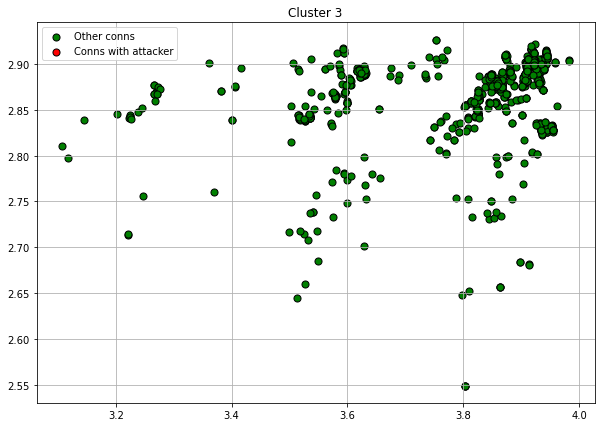

Total num of conns: 912

Attacker conns ratio:
No    912
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    323
192.168.10.16    176
192.168.10.14     91
192.168.10.12     76
192.168.10.17     66
192.168.10.8      58
192.168.10.5      45
192.168.10.9      44
192.168.10.19     19
192.168.10.51      8
192.168.10.25      6
Name: originated_ip, dtype: int64

23.111.11.111     54
69.172.216.111    25
195.142.107.70    16
69.172.216.55     14
172.217.10.130    12
                  ..
54.225.163.44      1
151.101.21.128     1
54.225.202.195     1
52.84.145.147      1
172.217.12.166     1
Name: responded_ip, Length: 420, dtype: int64

Time:
timestamp min = 2017-07-07T18:55:35.335404Z
timestamp max = 2017-07-07T19:24:01.382361Z

Cluster 3 OK sample connections:


uid  originated_ip_num  originated_ip  \
84467   CSiqhd2HUVSMKI7fJi            0.54203   192.168.10.8   
100461   CGQu8tVZH94AGr51f            0.54203  192.168.10.15   
17668    C5WYL8DACh2dxFLCi            0.54203  192.168.10.15   
66335   CzqB141VW3LxpzsYP7            0.54203  192.168.10.15   
24470   CdrifG1vJdgzDX9bk9            0.54203  192.168.10.15   
8031    CbgySB3RYZTsRCevy1            0.54203  192.168.10.15   
69559    Cjy4UdPFeceJOI8D8            0.54203  192.168.10.15   
93641    CDIaX9m0Il0cfJIfj            0.54203  192.168.10.12   
28163   CDMUoB2peJDICMxjx9            0.54203  192.168.10.15   
98717   C7QFQA1e7fRU3OgSx5            0.54203  192.168.10.17   
110020  CLHQCb2hOGaSSo7Jy7            0.54203  192.168.10.16   
25009   CnI8bO37X8zPJy9Ej7            0.54203  192.168.10.17   
1352    CiBZS22Cx192lKxdUc            0.54203   192.168.10.5   
115849   Ck9aau4KnIqJUTf8d            0.54203  192.168.10.14   
97476   CRahTu3I5ZkonfAVc8            0.54203  192.168.10.16   

        responded_ip_num     responded_ip                    timestamp  \
84467            0.96719  216.200.232.121   2017-07-07T19:08:28.60294Z   
100461           0.29832   69.172.216.111  2017-07-07T19:11:23.456425Z   
17668            0.42959    98.139.225.43  2017-07-07T18:57:00.339269Z   
66335            0.29832    69.172.216.58  2017-07-07T19:11:21.781124Z   
24470            0.45612      104.97.71.5  2017-07-07T18:56:53.992243Z   
8031             0.21945      52.84.3.171  2017-07-07T18:56:52.941583Z   
69559            0.29832    69.172.216.56  2017-07-07T18:58:17.721416Z   
93641            0.21945       52.84.8.26  2017-07-07T19:00:04.854088Z   
28163            0.08807    23.111.11.111  2017-07-07T19:12:54.430044Z   
98717            0.82421    185.86.138.79  2017-07-07T19:13:14.627982Z   
110020           0.20918    50.17.232.169  2017-07-07T18:58:45.843051Z   
25009            0.77156   173.194.66.108  2017-07-07T18:57:55.299379Z   
1352             0.76742   172.217.12.195  2017-07-07T19:14:31.768716Z   
115849           0.76742   172.217.12.205  2017-07-07T19:09:28.300466Z   
97476            0.76742   172.217.10.102  2017-07-07T19:13:42.728162Z   

        connection.time  duration  connection.duration protocol service  \
84467           0.45001   5.43250              0.00414      tcp     ssl   
100461          0.54740   0.12394              0.00009      tcp     ssl   
17668           0.06665  16.23639              0.01236      tcp     ssl   
66335           0.54647   5.19107              0.00395      tcp     ssl   
24470           0.06311   1.43143              0.00109      tcp     ssl   
8031            0.06253 181.10706              0.13790      tcp     ssl   
69559           0.10975   0.33537              0.00026      tcp     ssl   
93641           0.16942 115.71589              0.08811      tcp     ssl   
28163           0.59808   5.08490              0.00387      tcp     ssl   
98717           0.60933 116.64008              0.08881      tcp     ssl   
110020          0.12541   5.42966              0.00413      tcp     ssl   
25009           0.09726   1.87549              0.00143      tcp     ssl   
1352            0.65229   0.31232              0.00024      tcp     ssl   
115849          0.48326 180.40145              0.13736      tcp     ssl   
97476           0.62498   0.20434              0.00016      tcp     ssl   

       conn_state  connection.orig_p  o_port       orig_p_cat  \
84467          SF            0.14903    9769  orig_reg_or_dyn   
100461         SF            0.90494   59303  orig_reg_or_dyn   
17668          SF            0.89740   58809  orig_reg_or_dyn   
66335          SF            0.90470   59287  orig_reg_or_dyn   
24470          SF            0.89589   58710  orig_reg_or_dyn   
8031           SF            0.89533   58673  orig_reg_or_dyn   
69559          SF            0.89834   58870  orig_reg_or_dyn   
93641          SF            0.68069   44608  orig_reg_or_dyn   
28163          SF          

Protocol:
tcp    912
Name: protocol, dtype: int64

Service:
ssl     899
none     13
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    912
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           901
resp_well_known     11
Name: resp_p_cat, dtype: int64




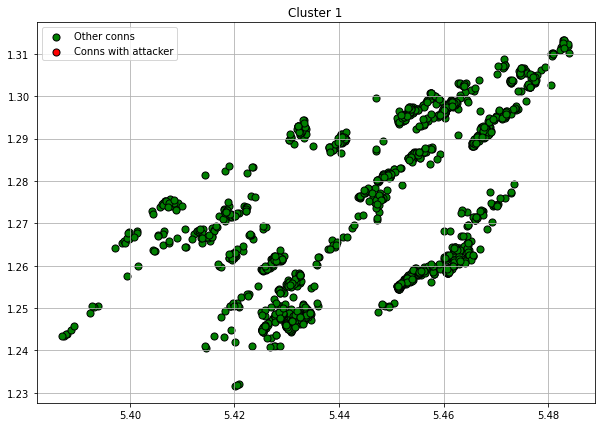

Total num of conns: 1443

Attacker conns ratio:
No    1443
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    1443
Name: originated_ip, dtype: int64

192.168.10.1    1443
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T18:55:10.789596Z
timestamp max = 2017-07-07T19:24:55.973108Z

Cluster 1 OK sample connections:


uid  originated_ip_num originated_ip  responded_ip_num  \
40787   CtVYYk4bw77LgSsl34            0.54203  192.168.10.3           0.85749   
26551   CgO4yg3AhAV9Xk0lE9            0.54203  192.168.10.3           0.85749   
70483   C0RYvl3VvpcOQqWlF5            0.54203  192.168.10.3           0.85749   
65560   C8xf0W2dKH2QCODNgd            0.54203  192.168.10.3           0.85749   
49021   CIW2h73m6yo8Qxpa47            0.54203  192.168.10.3           0.85749   
36916    CFx2jxNDRKhLOdsJg            0.54203  192.168.10.3           0.85749   
29409   CIU9bg2qP5oFO538l5            0.54203  192.168.10.3           0.85749   
21803   COmVu23xjUEgBdddt2            0.54203  192.168.10.3           0.85749   
102847  CRipr938zy9Njf7PH7            0.54203  192.168.10.3           0.85749   
106414  CTEtS529vhqTYOr8t4            0.54203  192.168.10.3           0.85749   
98648    CQCH0RUhISPNJzjqb            0.54203  192.168.10.3           0.85749   
21990   C69hdC1CxMckePV0C6            0.54203  192.168.10.3           0.85749   
45319   CMR0Ho3DWYEUHdEzS1            0.54203  192.168.10.3           0.85749   
41746   Co97xm2AVYOdsLGL74            0.54203  192.168.10.3           0.85749   
104201  CfvZ4b3PvRLBIdsUIl            0.54203  192.168.10.3           0.85749   

        responded_ip                    timestamp  connection.time  duration  \
40787   192.168.10.1  2017-07-07T19:19:43.493036Z          0.82592   0.63507   
26551   192.168.10.1   2017-07-07T18:57:36.37244Z          0.08672   0.30012   
70483   192.168.10.1  2017-07-07T18:56:51.707569Z          0.06184   2.21076   
65560   192.168.10.1  2017-07-07T19:13:46.256066Z          0.62694   0.02356   
49021   192.168.10.1  2017-07-07T19:19:44.539675Z          0.82651   0.06075   
36916   192.168.10.1  2017-07-07T18:56:55.189385Z          0.06378   0.04693   
29409   192.168.10.1  2017-07-07T19:22:40.484183Z          0.92451   0.00040   
21803   192.168.10.1  2017-07-07T18:56:51.713092Z          0.06184   0.04982   
102847  192.168.10.1  2017-07-07T19:16:03.998979Z          0.70367   0.06722   
106414  192.168.10.1   2017-07-07T19:23:54.29546Z          0.96562   0.03065   
98648   192.168.10.1  2017-07-07T19:13:13.955838Z          0.60895   0.07119   
21990   192.168.10.1  2017-07-07T19:08:25.357949Z          0.44820   0.02465   
45319   192.168.10.1  2017-07-07T19:16:02.798764Z          0.70300   0.02403   
41746   192.168.10.1  2017-07-07T19:16:06.883653Z          0.70527   0.02347   
104201  192.168.10.1  2017-07-07T18:59:22.409284Z          0.14578   0.04854   

        connection.duration protocol service conn_state  connection.orig_p  \
40787               0.00048      udp     dns         SF            0.93722   
26551               0.00023      udp     dns         SF            0.91930   
70483               0.00168      udp     dns         SF            0.93182   
65560               0.00002      udp     dns         SF            0.94505   
49021               0.00005      udp     dns         SF            0.92026   
36916               0.00004      udp     dns         SF            0.92916   
29409               0.00000      udp     dns         SF            0.95140   
21803               0.00004      udp     dns         SF            0.93243   
102847              0.00005      udp     dns         SF            0.91642   
106414              0.00002      udp     dns         SF            0.93183   
98648               0.00005      udp     dns         SF            0.93577   
21990               0.00002      udp     dns         SF            0.93140   
45319               0.00002      udp     dns         SF            0.91729   
41746               0.00002      udp     dns         SF            0.91938   
104201              0.00004      udp     dns         SF            0.92181   

        o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
40787    61418  orig_reg_or_dyn                0.00028       48   
26551    60244  orig_reg_or_dyn                0.00030       5

Protocol:
udp    1443
Name: protocol, dtype: int64

Service:
dns    1443
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1443
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    1443
Name: resp_p_cat, dtype: int64




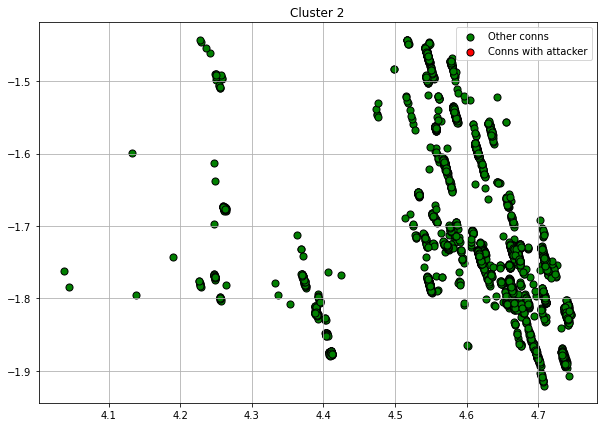

Total num of conns: 3794

Attacker conns ratio:
No    3794
Name: attacker_label, dtype: int64

IPs:
192.168.10.12    2145
192.168.10.15     478
192.168.10.16     393
192.168.10.14     218
192.168.10.17     156
192.168.10.5      135
192.168.10.8      100
192.168.10.9       86
192.168.10.19      75
192.168.10.25       7
192.168.10.51       1
Name: originated_ip, dtype: int64

192.168.10.3    3794
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T18:55:09.893256Z
timestamp max = 2017-07-07T19:23:41.866628Z

Cluster 2 OK sample connections:


uid  originated_ip_num  originated_ip  \
18643   CvhCpN3BHTX2sHd1m1            0.54203  192.168.10.12   
91312   CiU2lr1n8DzIxb7oVa            0.54203  192.168.10.15   
15837   Cb5xLJ3TthvhfkCrs9            0.54203  192.168.10.12   
66827    ChMM4l4EwY1ShLXaR            0.54203  192.168.10.12   
102511  CxLeyK35W3oKWKGGR2            0.54203  192.168.10.16   
75126    CcDMsAXsYU0fDvN0f            0.54203  192.168.10.12   
73301    CRwrexDOjWcOF4jU1            0.54203  192.168.10.14   
88642   Cnp5HD2UIrHxUbkn87            0.54203  192.168.10.14   
25046    C2iI4wXrQTgmaboui            0.54203  192.168.10.12   
43580   C28c2F2raHrZrvXYUg            0.54203  192.168.10.12   
89470   Cmfu3X3GHZq3aq8GRj            0.54203  192.168.10.15   
97185   Cf9TdW2jNWxOqsFfVj            0.54203  192.168.10.12   
60789   C65Idl29NazhW5wLaj            0.54203  192.168.10.17   
26522    CzdgGW4mYuy8EKEga            0.54203  192.168.10.19   
26040   CChLN24pd5CoIrcDGe            0.54203  192.168.10.12   

        responded_ip_num  responded_ip                    timestamp  \
18643            0.85749  192.168.10.3  2017-07-07T19:15:37.683793Z   
91312            0.85749  192.168.10.3  2017-07-07T18:56:55.238105Z   
15837            0.85749  192.168.10.3  2017-07-07T19:07:22.555038Z   
66827            0.85749  192.168.10.3  2017-07-07T19:07:22.177391Z   
102511           0.85749  192.168.10.3  2017-07-07T19:13:46.769749Z   
75126            0.85749  192.168.10.3   2017-07-07T19:00:10.67129Z   
73301            0.85749  192.168.10.3  2017-07-07T19:09:32.531118Z   
88642            0.85749  192.168.10.3  2017-07-07T19:04:55.933209Z   
25046            0.85749  192.168.10.3  2017-07-07T18:59:13.837015Z   
43580            0.85749  192.168.10.3  2017-07-07T19:07:28.022258Z   
89470            0.85749  192.168.10.3  2017-07-07T19:11:18.047193Z   
97185            0.85749  192.168.10.3  2017-07-07T19:15:37.764583Z   
60789            0.85749  192.168.10.3  2017-07-07T19:13:08.424077Z   
26522            0.85749  192.168.10.3    2017-07-07T18:57:10.2882Z   
26040            0.85749  192.168.10.3  2017-07-07T19:09:30.844926Z   

        connection.time  duration  connection.duration protocol service  \
18643           0.68901   0.00018              0.00000      udp     dns   
91312           0.06381   0.04146              0.00003      udp     dns   
15837           0.41322   0.00026              0.00000      udp     dns   
66827           0.41301   0.00023              0.00000      udp     dns   
102511          0.62723   0.02477              0.00002      udp     dns   
75126           0.17266   0.06329              0.00005      udp     dns   
73301           0.48562   0.02390              0.00002      udp     dns   
88642           0.33155   0.04752              0.00004      udp     dns   
25046           0.14101   0.00018              0.00000      udp     dns   
43580           0.41627   0.00097              0.00000      udp     dns   
89470           0.54439   0.00017              0.00000      udp     dns   
97185           0.68905   0.00022              0.00000      udp     dns   
60789           0.60587   0.03164              0.00002      udp     dns   
26522           0.07219   0.05078              0.00004      udp     dns   
26040           0.48468   0.00020              0.00000      udp     dns   

       conn_state  connection.orig_p  o_port       orig_p_cat  \
18643          SF            0.59479   38979  orig_reg_or_dyn   
91312          SF            0.82345   53963  orig_reg_or_dyn   
15837          SF            0.36608   23992  orig_reg_or_dyn   
66827          SF            0.17118   11220  orig_reg_or_dyn   
102511         SF            0.25964   17017  orig_reg_or_dyn   
75126          SF            0.60311   39524  orig_reg_or_dyn   
73301          SF            0.81913   53680  orig_reg_or_dyn   
88642          SF            0.92947   60910  orig_reg_or_dyn   
25046          SF            0.61171   40088  orig_reg_or_dyn   
43580     

Protocol:
udp    3794
Name: protocol, dtype: int64

Service:
dns    3794
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3794
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    3794
Name: resp_p_cat, dtype: int64




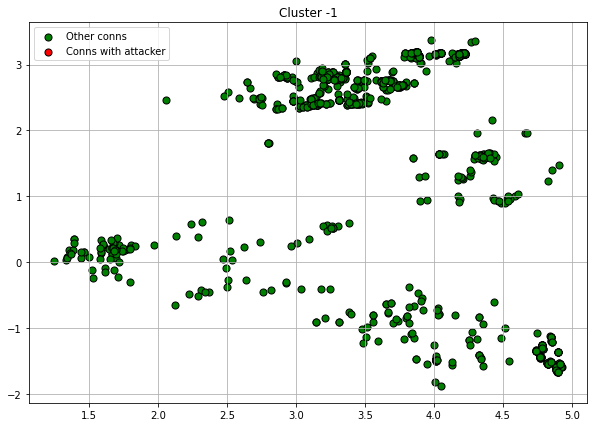

Total num of conns: 1082

Attacker conns ratio:
No     1069
Yes      13
Name: attacker_label, dtype: int64

IPs:
192.168.10.9     211
192.168.10.15    178
192.168.10.50    132
192.168.10.14    121
192.168.10.25     91
192.168.10.8      86
192.168.10.5      82
192.168.10.17     55
192.168.10.12     30
192.168.10.51     27
192.168.10.16     25
192.168.10.19     20
172.16.0.1        13
192.168.10.3      11
Name: originated_ip, dtype: int64

192.168.10.3      203
205.174.165.73    135
192.168.10.50      88
192.168.10.255     29
114.80.165.63      20
                 ... 
172.217.3.110       1
54.223.131.0        1
54.165.89.238       1
176.32.93.58        1
61.213.187.245      1
Name: responded_ip, Length: 309, dtype: int64

Time:
timestamp min = 2017-07-07T18:55:01.362543Z
timestamp max = 2017-07-07T19:24:54.387197Z

Cluster -1 OK sample connections:


uid  originated_ip_num  originated_ip  \
87721   CdySPy1G28LlAYiAu9            0.54203   192.168.10.9   
70725    C8u1dThszhuQc5Wef            0.54203  192.168.10.14   
76832   CCheXI2mBU3tBK7gt4            0.54203  192.168.10.15   
18368   CzCyFJ3vifUPxrLF1b            0.54203   192.168.10.9   
113808  C04EbB2AghfTyrA0Fh            0.54203  192.168.10.14   
29227   CwVLWv1klmmMTpTG24            0.54203   192.168.10.9   
20623   CqZmaT1Ue85Fz4mEGh            0.54203   192.168.10.9   
92821   CXuc9l279L3BA6qlZ3            0.54203  192.168.10.50   
89611   CNfRuZ1MxGk6ir75rl            0.54203  192.168.10.15   
44369   CqfChy3qLNMFLUdK9h            0.54203  192.168.10.19   
81229    ClFsG7nCi37VchOY3            0.54203  192.168.10.19   
4475    CnfUUl3FBB8SpQQFi2            0.54203  192.168.10.14   
84351   CAzjfG4zaln4XnE36e            0.54203  192.168.10.15   
66731   C1PNT72KvRZgJR02Q3            0.54203   192.168.10.8   
54222    CX7ezz2X2yLrg7ZPx            0.54203  192.168.10.16   

        responded_ip_num    responded_ip                    timestamp  \
87721            0.23150  54.250.127.144  2017-07-07T19:23:52.414068Z   
70725            0.30927     72.21.91.29   2017-07-07T19:22:56.52597Z   
76832            0.08807   23.111.11.111  2017-07-07T19:14:44.905888Z   
18368            0.45467   104.16.27.216   2017-07-07T19:23:49.53516Z   
113808           0.76742  172.217.12.194  2017-07-07T19:23:02.574892Z   
29227            0.76742  172.217.10.142  2017-07-07T18:55:04.243276Z   
20623            0.88702   199.38.165.28  2017-07-07T19:16:07.174965Z   
92821            0.85749    192.168.10.3  2017-07-07T19:01:22.282476Z   
89611            0.91671  205.174.165.73  2017-07-07T18:57:55.487123Z   
44369            0.85749   192.168.10.50  2017-07-07T19:22:53.946129Z   
81229            0.85749  192.168.10.255  2017-07-07T19:08:31.076747Z   
4475             0.08707    23.54.187.27  2017-07-07T19:22:59.271411Z   
84351            0.91671  205.174.165.73  2017-07-07T19:00:00.043617Z   
66731            0.91671  205.174.165.73   2017-07-07T18:59:34.32199Z   
54222            0.85749   192.168.10.50  2017-07-07T18:57:23.688194Z   

        connection.time  duration  connection.duration protocol service  \
87721           0.96457  62.15422              0.04733      tcp     ssl   
70725           0.93344 121.78616              0.09273      tcp    http   
76832           0.65961   5.65568              0.00431      tcp     ssl   
18368           0.96297  51.48501              0.03920      tcp    http   
113808          0.93681 116.71232              0.08887      tcp     ssl   
29227           0.00198  45.23648              0.03444      tcp    none   
20623           0.70544  11.04190              0.00841      tcp     ssl   
92821           0.21255   0.00017              0.00000      udp     dns   
89611           0.09736   0.00044              0.00000      tcp    none   
44369           0.93201   1.31570              0.00100      tcp     ssh   
81229           0.45139   0.00002              0.00000      udp    none   
4475            0.93497   5.62799              0.00429      tcp    none   
84351           0.16674   0.00062              0.00000      tcp    none   
66731           0.15242   0.00215              0.00000      tcp    none   
54222           0.07965   1.31109              0.00100      tcp     ssh   

       conn_state  connection.orig_p  o_port       orig_p_cat  \
87721          SF            0.15218    9975  orig_reg_or_dyn   
70725          SF            0.89226   58472  orig_reg_or_dyn   
76832          SF            0.90903   59571  orig_reg_or_dyn   
18368          SF            0.15091    9892  orig_reg_or_dyn   
113808         S1            0.89347   58551  orig_reg_or_dyn   
29227          SF            0.14336    9397  orig_reg_or_dyn   
20623        RSTR            0.14974    9815  orig_reg_or_dyn   
92821          SF            0.38043   24932  orig_reg_or_dyn   
89611         REJ            0.89818   5886

Protocol:
tcp     807
udp     262
icmp     13
Name: protocol, dtype: int64

Service:
ssl                   370
none                  296
dns                   183
http                   92
ntp                    49
ssh                    35
ftp-data               16
ftp                    10
krb                     7
dce_rpc,gssapi,smb      7
krb_tcp                 6
dce_rpc                 6
krb,gssapi,smb          4
ntlm,gssapi,smb         1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    976
orig_well_known    106
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           386
resp_80            176
resp_reg           156
resp_53            142
resp_well_known    122
resp_123            49
resp_22             35
resp_21             10
resp_dyn             6
Name: resp_p_cat, dtype: int64




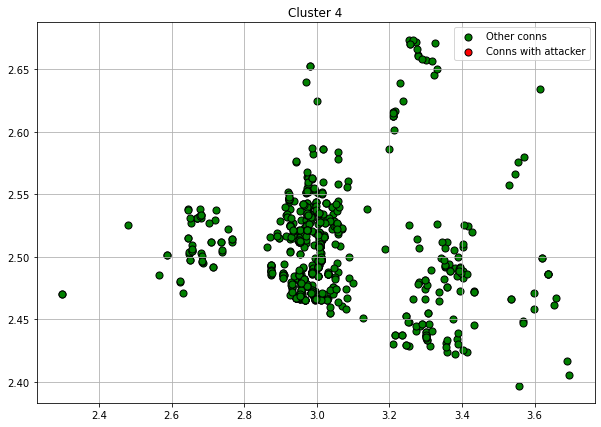

Total num of conns: 872

Attacker conns ratio:
No    872
Name: attacker_label, dtype: int64

IPs:
192.168.10.12    427
192.168.10.16    174
192.168.10.14     78
192.168.10.15     73
192.168.10.5      49
192.168.10.17     27
192.168.10.9      22
192.168.10.8      18
192.168.10.19      3
192.168.10.25      1
Name: originated_ip, dtype: int64

61.251.165.12     230
119.205.194.11     59
23.61.187.27       39
178.255.83.1       35
72.21.91.29        33
                 ... 
61.110.225.90       1
195.142.107.70      1
52.84.3.10          1
54.152.24.232       1
23.15.4.11          1
Name: responded_ip, Length: 220, dtype: int64

Time:
timestamp min = 2017-07-07T18:55:09.086723Z
timestamp max = 2017-07-07T19:22:41.348636Z

Cluster 4 OK sample connections:


uid  originated_ip_num  originated_ip  \
40467   CwMYZ12njpbRZsUamd            0.54203  192.168.10.12   
44340     C4OsRFF7AdO49DOr            0.54203  192.168.10.16   
6923    CKsQMP2DIzE2xKCiG9            0.54203  192.168.10.14   
69035    C3iXVNKnhDsWsX2Pi            0.54203  192.168.10.12   
9293    CqHqgp2gGXMtK1pASf            0.54203  192.168.10.12   
14434    CLvUaWOofjR5XWr9a            0.54203  192.168.10.15   
107207  CcmiMf4x58nnaoOoSb            0.54203  192.168.10.17   
40804   COSJdA3cVMSR11jEEe            0.54203  192.168.10.15   
50388   C1lM063fqsSMruOpm5            0.54203  192.168.10.12   
28926   CVQoEH1Rx8PH0CkDVe            0.54203  192.168.10.15   
30060   C3JWt42YnTT3FxRRT1            0.54203  192.168.10.12   
22292   C9MvKt3yDPZFyL0TA5            0.54203  192.168.10.15   
93144   C2Cmj34oRe5S4l3XCa            0.54203  192.168.10.15   
55517   CtXIIN3tZc8qdi0zPb            0.54203  192.168.10.12   
26584   CegwTb2u2hfAfJQxBb            0.54203  192.168.10.12   

        responded_ip_num    responded_ip                    timestamp  \
40467            0.52624  119.205.194.11   2017-07-07T18:55:10.40674Z   
44340            0.49624   113.52.156.18  2017-07-07T19:13:46.761396Z   
6923             0.31186   72.167.18.239  2017-07-07T19:04:56.547129Z   
69035            0.26335   61.251.165.12  2017-07-07T19:11:35.481137Z   
9293             0.26335   61.251.165.12  2017-07-07T19:11:33.781647Z   
14434            0.29533      69.4.95.11  2017-07-07T19:01:50.130926Z   
107207           0.08720    23.61.187.27  2017-07-07T19:13:12.017437Z   
40804            0.29533      69.4.95.11   2017-07-07T19:12:08.26343Z   
50388            0.15559   38.72.130.139  2017-07-07T19:03:18.619229Z   
28926            0.08703    23.52.155.27  2017-07-07T18:56:56.218669Z   
30060            0.26335   61.251.165.12  2017-07-07T19:05:22.955614Z   
22292            0.79538    178.255.83.1   2017-07-07T19:12:10.08431Z   
93144            0.08707    23.54.187.27  2017-07-07T19:11:17.403341Z   
55517            0.26335   61.251.165.12  2017-07-07T18:59:18.720635Z   
26584            0.26335   61.251.165.12  2017-07-07T18:59:18.286905Z   

        connection.time  duration  connection.duration protocol service  \
40467           0.00541  15.86191              0.01208      tcp    http   
44340           0.62723   0.47701              0.00036      tcp    http   
6923            0.33190   0.19474              0.00015      tcp    http   
69035           0.55410   0.42873              0.00033      tcp    http   
9293            0.55316   0.41914              0.00032      tcp    http   
14434           0.22806  75.59903              0.05756      tcp    http   
107207          0.60787   5.77644              0.00440      tcp    none   
40804           0.57236  71.71303              0.05460      tcp    http   
50388           0.27735   6.10419              0.00465      tcp    none   
28926           0.06435 115.73203              0.08812      tcp    http   
30060           0.34661   0.43244              0.00033      tcp    http   
22292           0.57338   0.15651              0.00012      tcp    http   
93144           0.54403  83.32405              0.06344      tcp    http   
55517           0.14373   0.42845              0.00033      tcp    http   
26584           0.14348   0.43362              0.00033      tcp    http   

       conn_state  connection.orig_p  o_port       orig_p_cat  \
40467          SF            0.61760   40474  orig_reg_or_dyn   
44340          SF            0.71228   46678  orig_reg_or_dyn   
6923           SF            0.88610   58068  orig_reg_or_dyn   
69035          SF            0.59099   38730  orig_reg_or_dyn   
9293           SF            0.59011   38672  orig_reg_or_dyn   
14434          SF            0.90123   59060  orig_reg_or_dyn   
107207         SF            0.57298   37550  orig_reg_or_dyn   
40804          SF            0.90577   59357  orig_reg_or_dyn   
50388          SF            0.65472   4290

Protocol:
tcp    872
Name: protocol, dtype: int64

Service:
http    742
none    130
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    872
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80    872
Name: resp_p_cat, dtype: int64




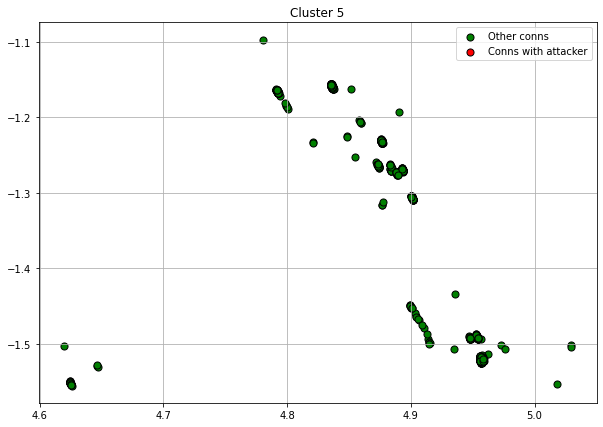

Total num of conns: 704

Attacker conns ratio:
No    704
Name: attacker_label, dtype: int64

IPs:
192.168.10.9     289
192.168.10.14    157
192.168.10.15    142
192.168.10.5      91
192.168.10.8      25
Name: originated_ip, dtype: int64

192.168.10.3    704
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-07T19:14:45.269688Z
timestamp max = 2017-07-07T19:24:55.972848Z

Cluster 5 OK sample connections:


uid  originated_ip_num  originated_ip  \
48703    Ce2A4PxnZdJ8bJZy4            0.54203  192.168.10.15   
47911   CApGHe227gznOqchX5            0.54203   192.168.10.5   
1639     CoNlPp1phQpZgn4d6            0.54203  192.168.10.15   
4004      CtGKTl7U48s9AMRY            0.54203   192.168.10.9   
70248   CCnfjg49Mm03POK8Cd            0.54203  192.168.10.14   
66895   C7lvHj2XbsniEMcwW5            0.54203   192.168.10.5   
37834   CboND51XOLmfAm1Q4j            0.54203  192.168.10.15   
115235   CGAijUbmQxfO5W5fl            0.54203   192.168.10.9   
110984   Cvryha0xif4qsuHKf            0.54203  192.168.10.15   
93299   CcNQzE3f36zXdd1Mq1            0.54203   192.168.10.9   
37787   CqnbaZ1m4tE0MkXXTj            0.54203  192.168.10.14   
59341   CcxJSv2bXYpuwYYX2f            0.54203  192.168.10.15   
72190    CTmHEXkzqAxDgqd49            0.54203  192.168.10.14   
72793   CTvW8T3z4DnsHZskcc            0.54203  192.168.10.14   
74547    Cjc9qnY8T316U1oLc            0.54203   192.168.10.9   

        responded_ip_num  responded_ip                    timestamp  \
48703            0.85749  192.168.10.3  2017-07-07T19:20:29.923359Z   
47911            0.85749  192.168.10.3  2017-07-07T19:23:27.892528Z   
1639             0.85749  192.168.10.3  2017-07-07T19:20:29.862811Z   
4004             0.85749  192.168.10.3  2017-07-07T19:23:50.968569Z   
70248            0.85749  192.168.10.3  2017-07-07T19:18:24.629173Z   
66895            0.85749  192.168.10.3  2017-07-07T19:23:28.318006Z   
37834            0.85749  192.168.10.3  2017-07-07T19:20:31.965109Z   
115235           0.85749  192.168.10.3  2017-07-07T19:16:07.160705Z   
110984           0.85749  192.168.10.3  2017-07-07T19:20:35.097095Z   
93299            0.85749  192.168.10.3  2017-07-07T19:23:55.572492Z   
37787            0.85749  192.168.10.3  2017-07-07T19:18:28.056971Z   
59341            0.85749  192.168.10.3  2017-07-07T19:20:33.705741Z   
72190            0.85749  192.168.10.3  2017-07-07T19:22:56.418493Z   
72793            0.85749  192.168.10.3  2017-07-07T19:23:05.029542Z   
74547            0.85749  192.168.10.3   2017-07-07T19:16:05.07243Z   

        connection.time  duration  connection.duration protocol service  \
48703           0.85179   0.03078              0.00002      udp     dns   
47911           0.95092   0.00015              0.00000      udp     dns   
1639            0.85175   0.00022              0.00000      udp     dns   
4004            0.96377   0.00015              0.00000      udp     dns   
70248           0.78200   0.06096              0.00005      udp     dns   
66895           0.95115   0.00019              0.00000      udp     dns   
37834           0.85292   0.03091              0.00002      udp     dns   
115235          0.70543   0.00021              0.00000      udp     dns   
110984          0.85467   0.03124              0.00002      udp     dns   
93299           0.96633   0.00016              0.00000      udp     dns   
37787           0.78391   0.00017              0.00000      udp     dns   
59341           0.85389   0.00022              0.00000      udp     dns   
72190           0.93338   0.00021              0.00000      udp     dns   
72793           0.93818   0.06114              0.00005      udp     dns   
74547           0.70426   0.02828              0.00002      udp     dns   

       conn_state  connection.orig_p  o_port       orig_p_cat  \
48703          SF            0.93702   61405  orig_reg_or_dyn   
47911          SF            0.75756   49645  orig_reg_or_dyn   
1639           SF            0.97889   64149  orig_reg_or_dyn   
4004           SF            0.99626   65287  orig_reg_or_dyn   
70248          SF            0.79949   52393  orig_reg_or_dyn   
66895          SF            0.80302   52624  orig_reg_or_dyn   
37834          SF            0.90297   59174  orig_reg_or_dyn   
115235         SF            0.76760   50303  orig_reg_or_dyn   
110984         SF            0.98109   64293  orig_reg_or_dyn   
93299     

Protocol:
udp    704
Name: protocol, dtype: int64

Service:
dns    704
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    704
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53    704
Name: resp_p_cat, dtype: int64




In [39]:
for i in pca_X['cluster'].unique():
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

In [41]:
# df['uid'] = result['uid']
# df['originated_ip_num'] = result['originated_ip_num']
# df['originated_ip'] = result['originated_ip']
# df['responded_ip_num'] = result['responded_ip_num']
# df['responded_ip'] = result['responded_ip']
# df['timestamp'] = result['timestamp']
# df['duration'] = result['duration']
# df['protocol'] = result['protocol']
# df['service'] = result['service']
# df['conn_state'] = result['conn_state']
# df['o_port'] = result['o_port']
# df['orig_p_cat'] = result['orig_p_cat']
# df['o_bytes'] = result['o_bytes']
# #df['o_ip_bytes'] = result['o_ip_bytes']
# df['r_port'] = result['r_port']
# df['resp_p_cat'] = result['resp_p_cat']
# df['r_bytes'] = result['r_bytes']
# #df['r_ip_bytes'] = result['r_ip_bytes']
# df['attacker_label'] = result['attacker_label']
# df['victim_label'] = result['victim_label']
# df['cluster'] = y_db
# df

In [43]:
from datetime import date

print(PREFIX_PATH + 'dbscan_backup' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'dbscan_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)
df.to_csv(PREFIX_PATH + 'dbscan_df_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/ddos/dbscan_backup09_12.csv


## Evaluation

Metric that quantifies level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

In [44]:
from sklearn import metrics

labels = db_fitted.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pca_X, labels))

Estimated number of clusters: 6
Estimated number of noise points: 1082
Silhouette Coefficient: 0.769


## Interpretation

Parallel coordinates plots.

In [45]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

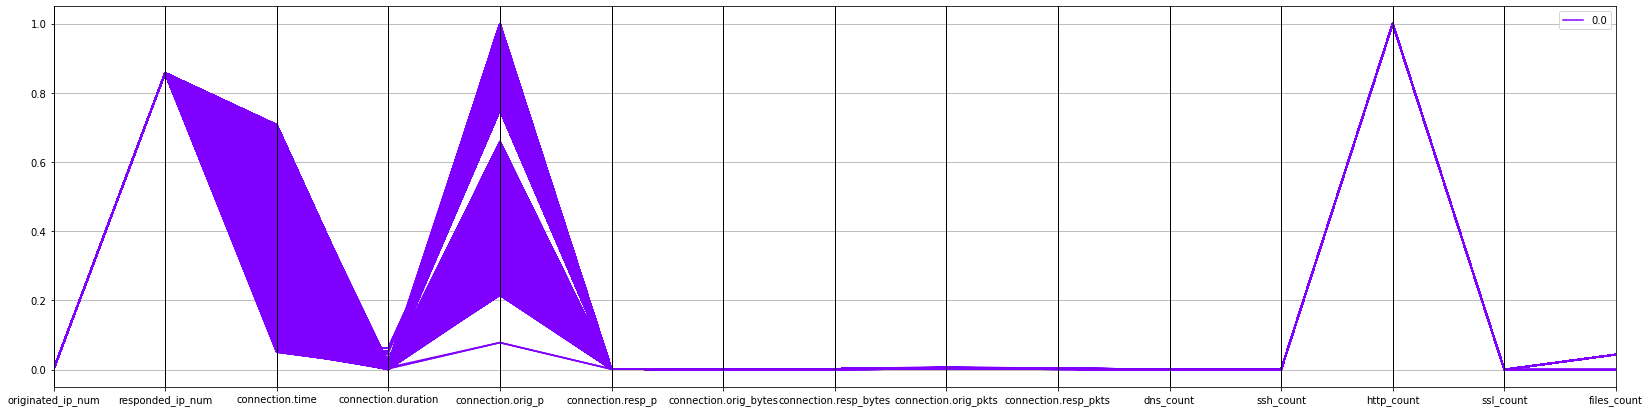

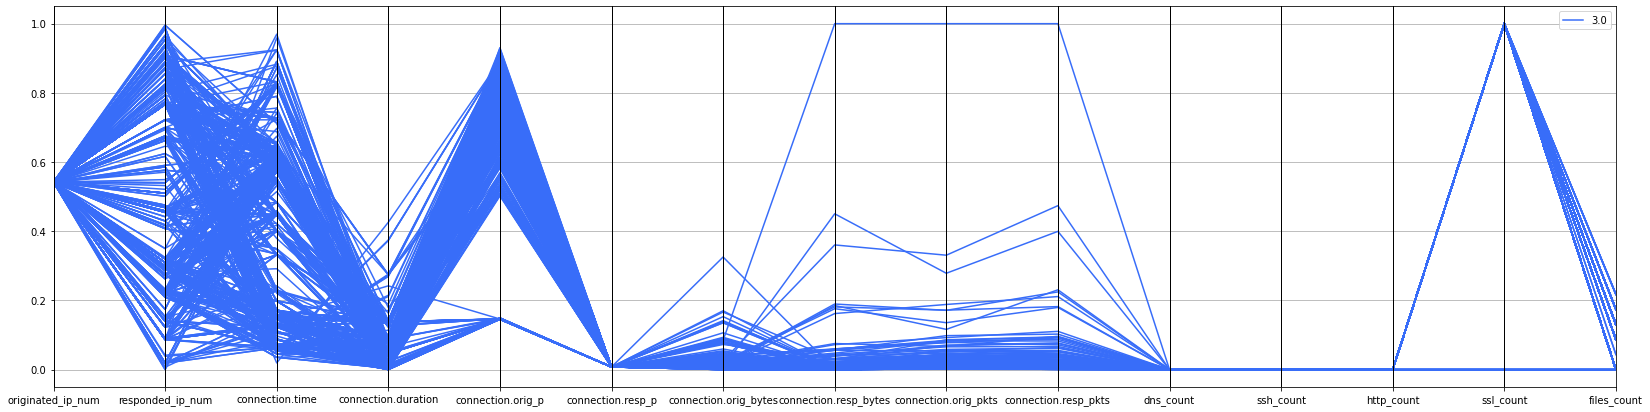

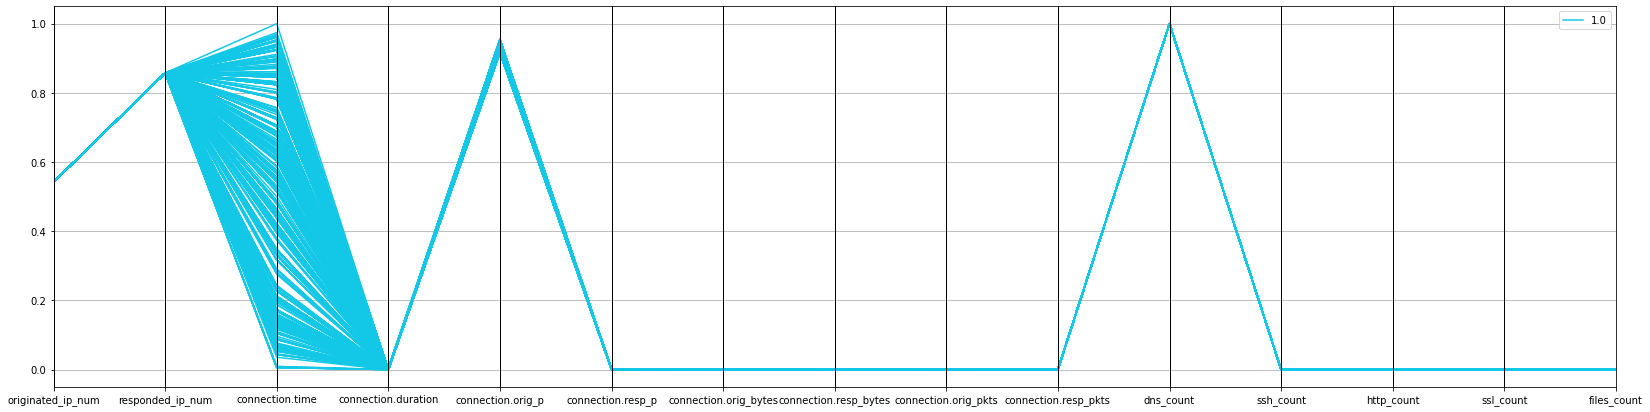

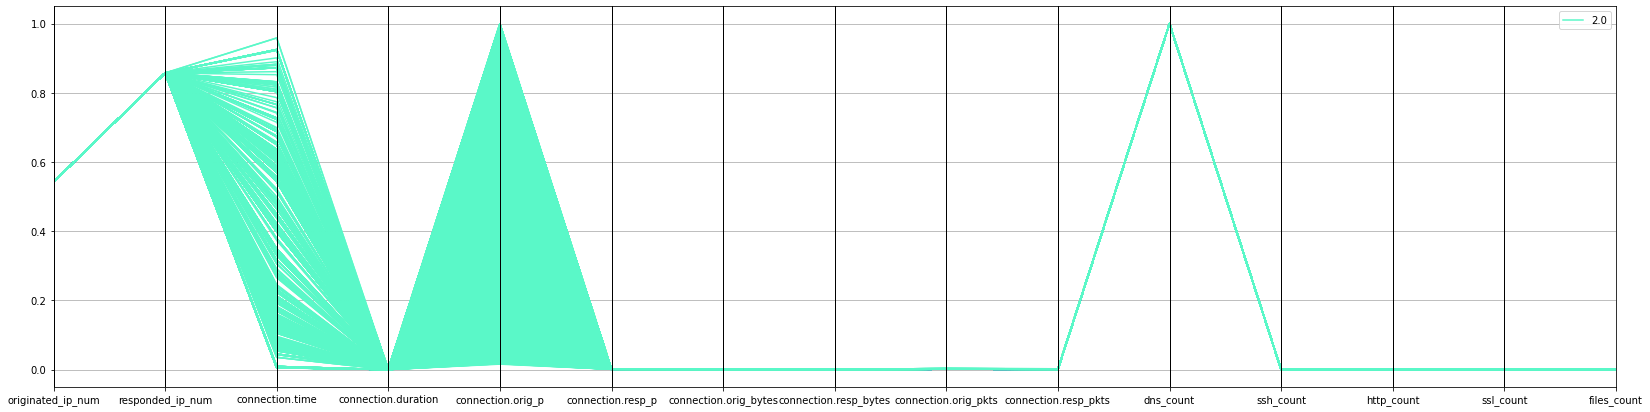

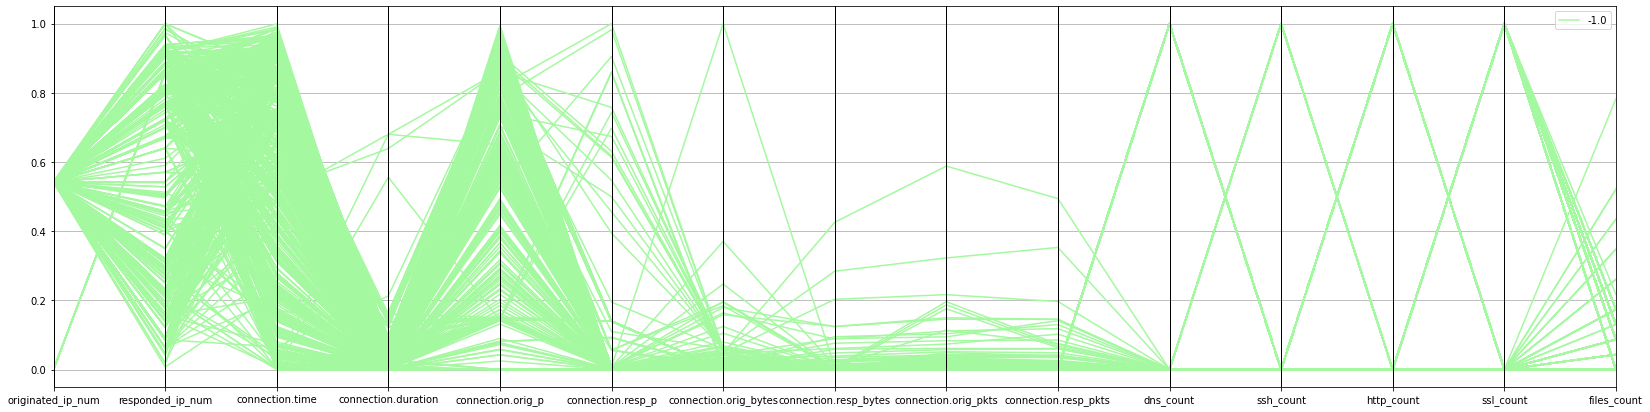

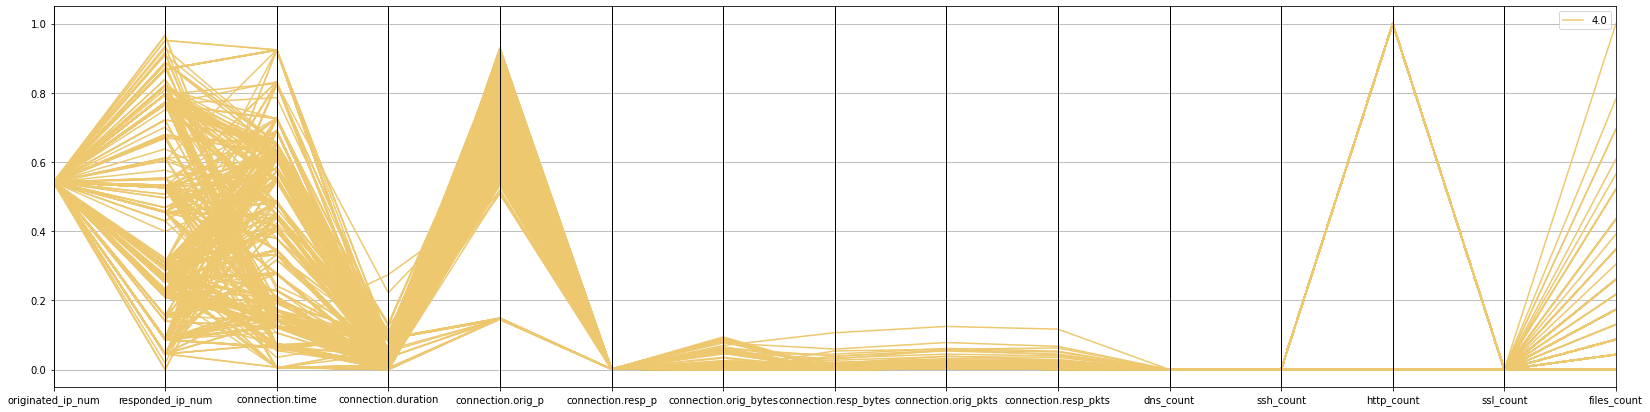

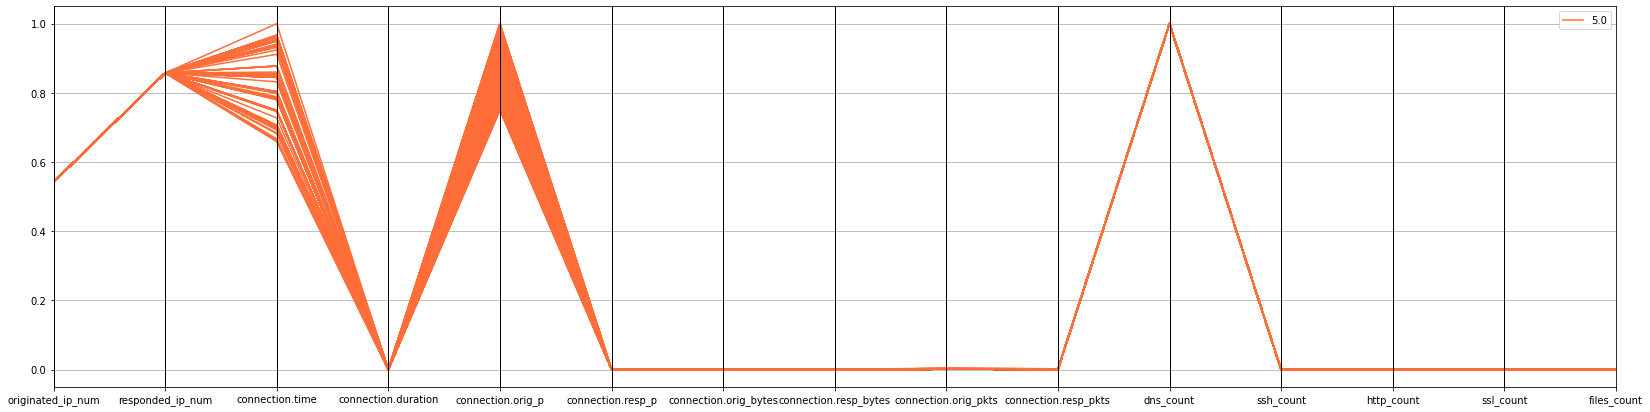

In [46]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

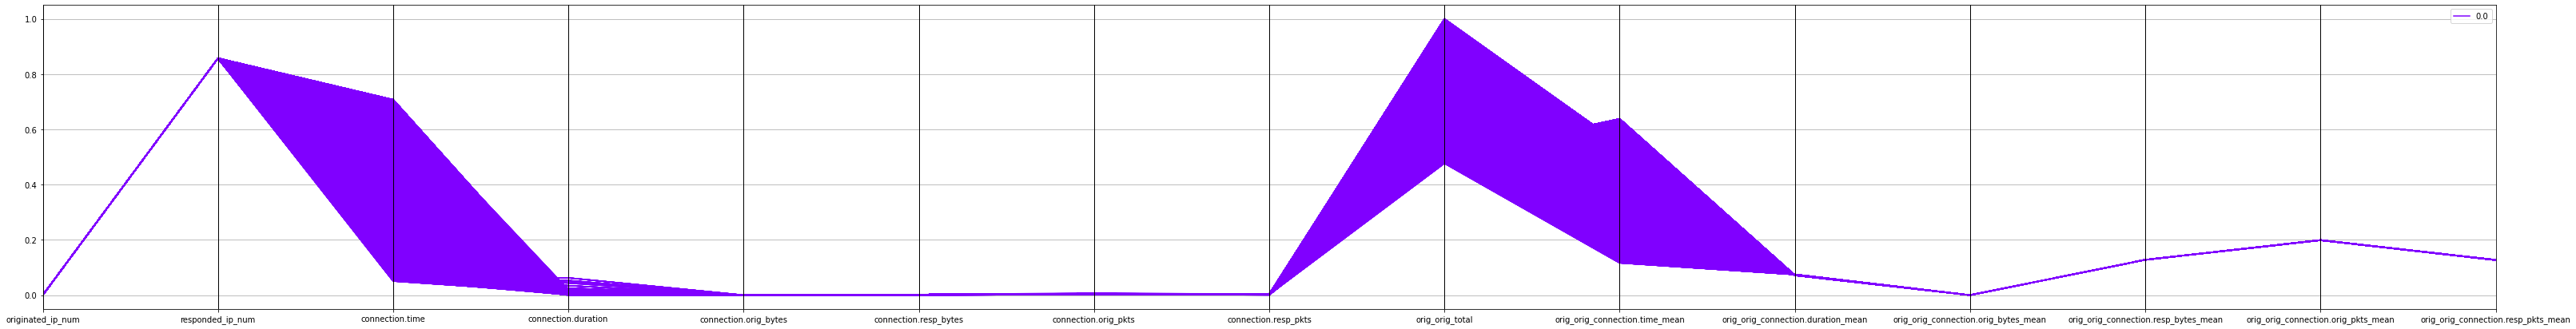

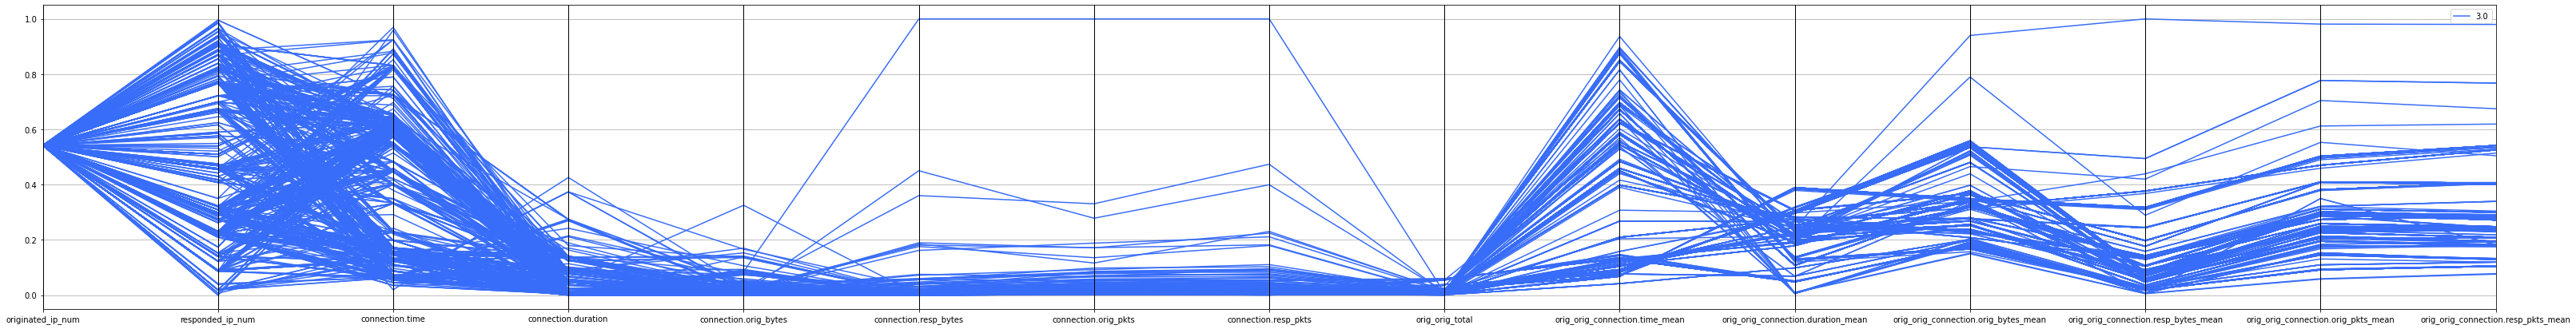

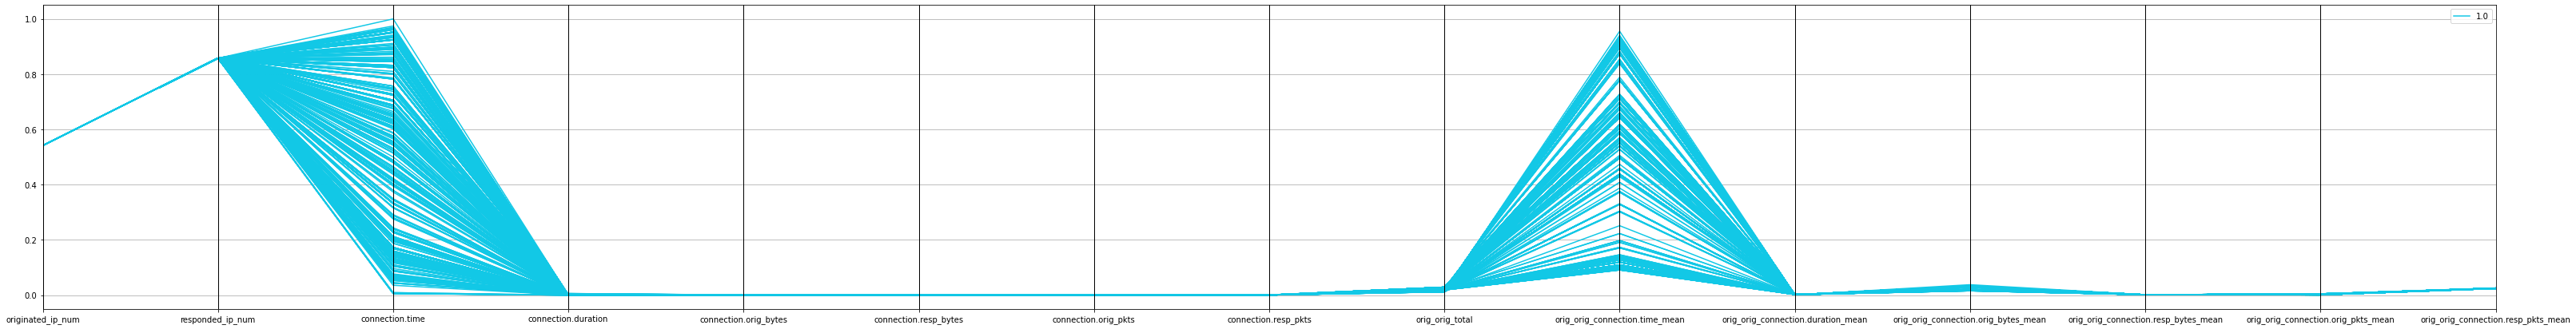

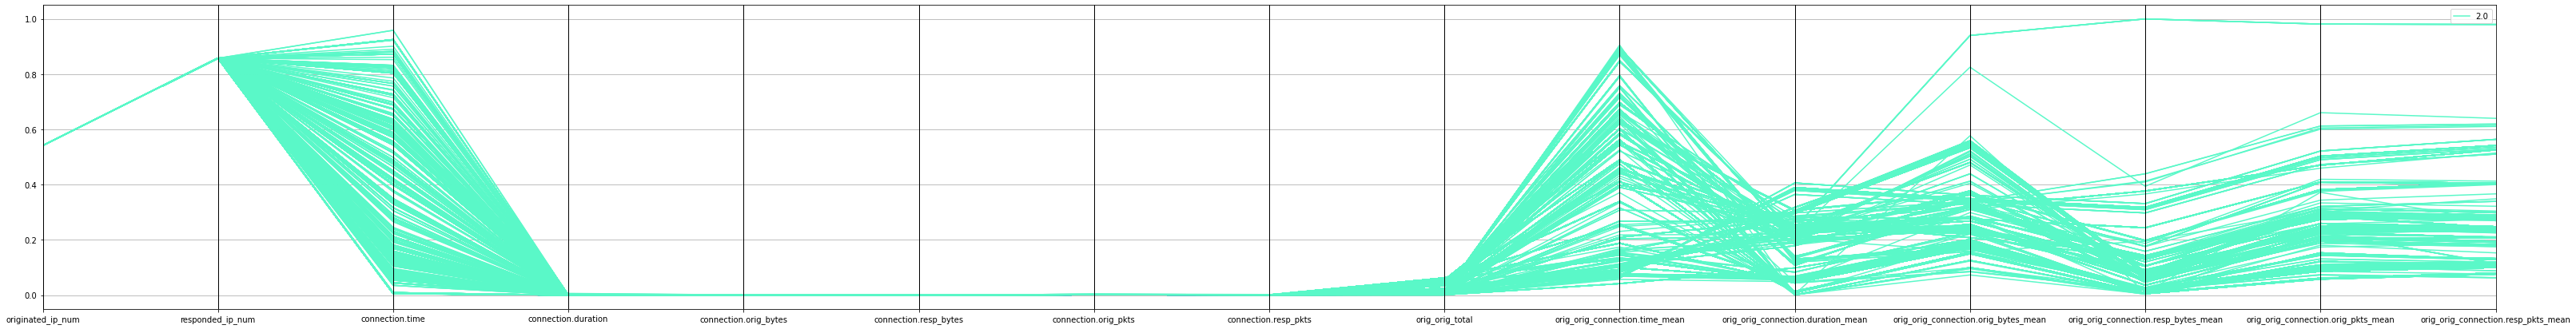

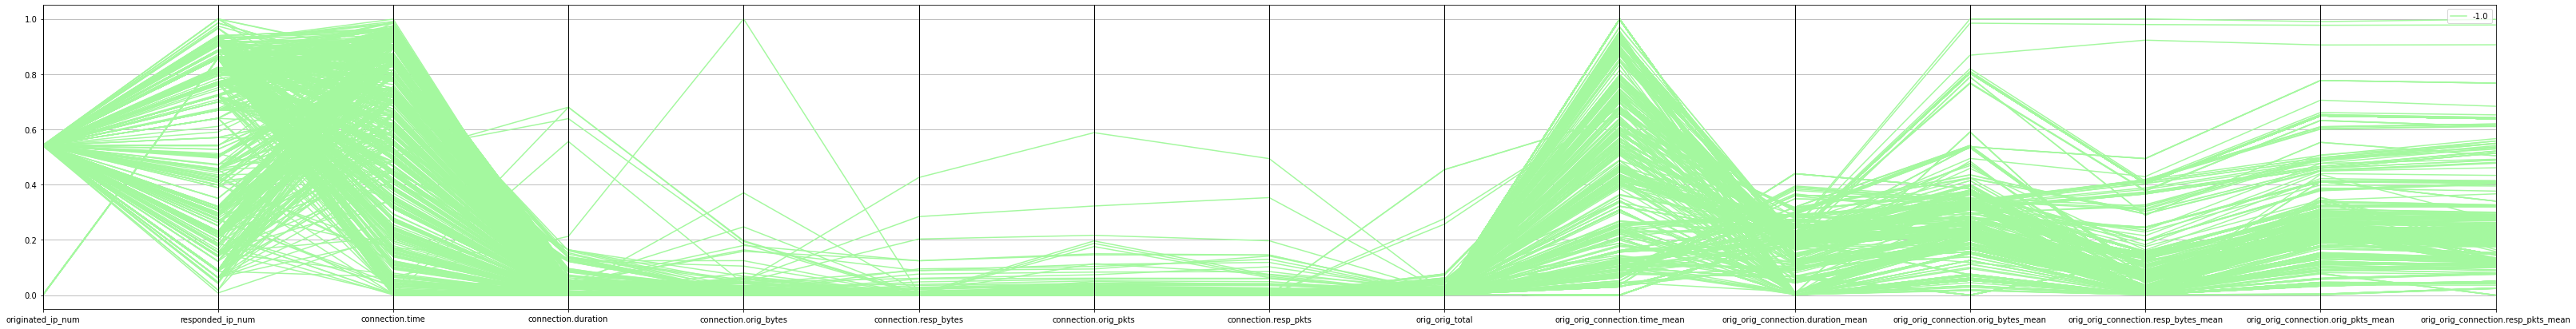

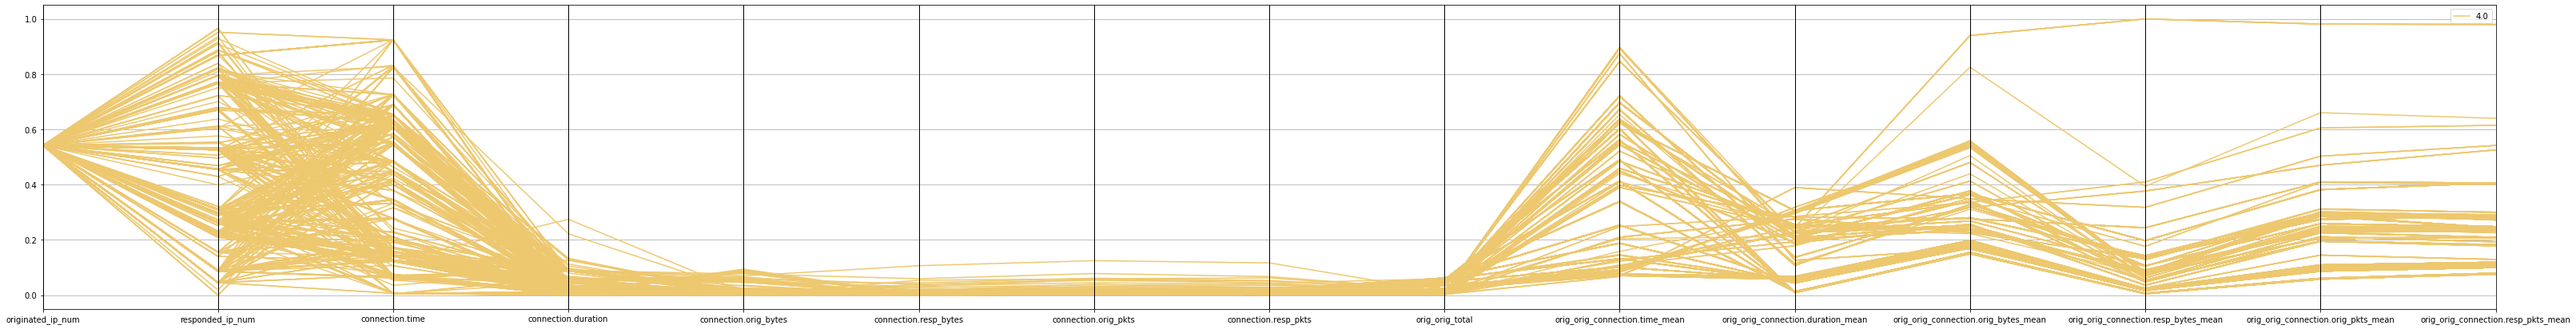

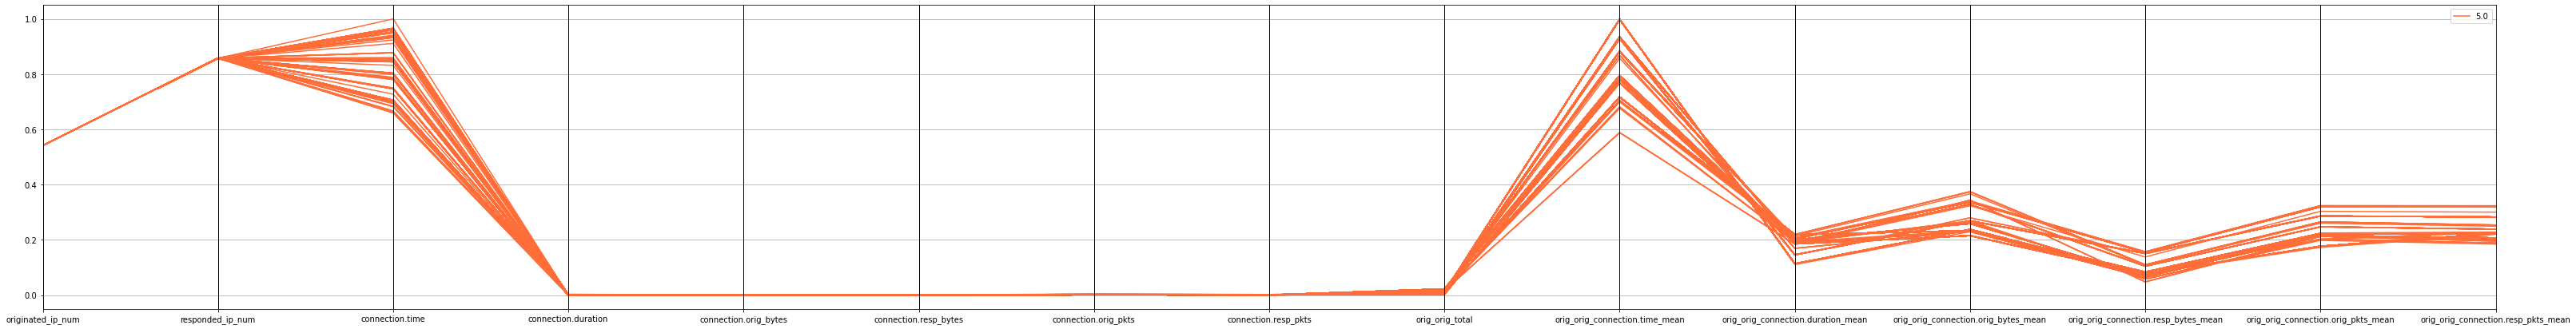

In [47]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()